# **Notebook d'analyse rapide et de visualisation des données extraites**

In [ ]:
! pip install pandas==2.2.0
! pip install mapclassify
! pip install unidecode
! pip install skimpy
! pip install plotly==5.19.0
! pip install geopandas==0.14.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 43.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.0 MB/s eta 0:00

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import plotly
import duckdb as dk
import missingno as msno
import ipywidgets as widgets

import mapclassify
import folium
from unidecode import unidecode
import plotly.graph_objects as go
from skimpy import skim
from IPython.display import display

**Import des tables**

In [ ]:
m_table_location_data = pd.read_csv("cities-data-and-location.csv")
display(m_table_location_data.head(5))

m_table_nasa_data = pd.read_csv("nasa-renewable-energy-data.csv")
display(m_table_nasa_data.head(5))

ville       2021       2014       1998       1988      1975  \
0    Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0   
1     Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0   
2    Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0   
3      Daloa   421879.0   319427.0   190719.0   121842.0   60837.0   
4  San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0   

           region  longitude  latitude  
0         Abidjan  -4.016107  5.320357  
1           Gbêkê  -5.029841  7.690606  
2            Poro  -5.634247  9.457472  
3  Haut-Sassandra  -6.451610  6.876690  
4       San-Pédro  -6.641549  4.758159

parameters    ville  201301  201302  201303  201304  201305  201306  201307  \
0       QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   17.70   16.48   
1       RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   87.81   87.31   
2  ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46    0.45    0.41   
3  CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   64.90   67.38   
4  CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65    0.65    0.66   

   201308  ...  202204  202205  202206  202207  202208  202209  202210  \
0   15.62  ...   18.80   18.92   18.07   16.85   16.42   17.21   18.31   
1   83.88  ...   85.19   87.31   87.19   86.88   89.06   89.19   87.50   
2    0.41  ...    0.49    0.48    0.43    0.45    0.41    0.39    0.48   
3   62.77  ...   76.53   75.40   75.05   62.77   71.47   76.45   69.23   
4    0.65  ...    0.65    0.65    0.65    0.66    0.66    0.69    0.66   

   202211  202212  202213  
0   18.31   17.46   17.82  
1   85.19   82.31   85.19  
2    0.52    0.52    0.47  
3   68.46   44.55   65.27  
4    0.65    0.60    0.63  

[5 rows x 132 columns]

In [ ]:
table_location_data = pd.DataFrame(m_table_location_data,
                                   columns=m_table_location_data.columns)

In [ ]:
# with duckdb, use LIKE instead '=' when value is a string in order to avoid
# error
dk.sql("SELECT * FROM table_location_data WHERE UPPER(region) LIKE 'ABI%';").df()

ville       2021       2014       1998       1988      1975   region  \
0      Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0  Abidjan   
1       Anyama   389592.0   148962.0    79548.0    56690.0   26406.0  Abidjan   
2  Bingerville   204656.0    91319.0    35944.0    28752.0   12527.0  Abidjan   

   longitude  latitude  
0  -4.016107  5.320357  
1  -4.056921  5.495890  
2  -3.888559  5.357773

In [ ]:
table_location_data

ville       2021       2014       1998       1988      1975  \
0         Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0   
1          Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0   
2         Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0   
3           Daloa   421879.0   319427.0   190719.0   121842.0   60837.0   
4       San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0   
5          Anyama   389592.0   148962.0    79548.0    56690.0   26406.0   
6    Yamoussoukro   340234.0   281735.0   161354.0   106659.0   37253.0   
7            Divo   294559.0   179455.0   120053.0    72329.0   35610.0   
8          Gagnoa   277044.0   213918.0   123832.0    85501.0   42285.0   
9          Soubré   272773.0   175163.0    89182.0    32817.0    7016.0   
10            Man   241969.0   188704.0   142187.0    89575.0   50288.0   
11        Duékoué   220953.0   185344.0    37374.0    27571.0   13297.0   
12        Bouaflé   213967.0   167263.0    76081.0    35750.0   17188.0   
13    Bingerville   204656.0    91319.0    35944.0    28752.0   12527.0   
14         Guiglo   171454.0   113796.0    64094.0    22328.0    9283.0   
15         Lakota   169330.0    77223.0    30154.0    21929.0   12958.0   
16     Abengourou   164424.0   135635.0    92821.0    59106.0   30028.0   
17          Ferké   160267.0   120150.0    73010.0    35139.0   24662.0   
18         Adzopé   156488.0    98846.0   104070.0    36150.0   21147.0   
19         Méagui   153483.0   132294.0    18093.0     7648.0       NaN   
20      Bondoukou   141568.0   117453.0    44335.0    33325.0   19021.0   
21          Dabou   138083.0    88430.0    65453.0    38407.0   23134.0   
22         Sinfra   137210.0   130277.0    49297.0    35340.0   17569.0   
23      Agboville   135082.0    95093.0    82216.0    46324.0   26914.0   
24         Vavoua   132528.0   134651.0    26224.0    22297.0    6957.0   
25         Danané   131586.0   104672.0    74344.0    30941.0   19608.0   
26   Grand-Béreby   129340.0    98686.0        NaN        NaN       NaN   
27           Oumé   127153.0   127850.0    45354.0    28772.0   14032.0   
28          Issia   126252.0    85727.0    56844.0    28821.0   10863.0   
29   Grand-Bassam   124567.0    84028.0    85093.0    41509.0   27273.0   
30      Bloléquin   123133.0    71854.0    24236.0     6608.0       NaN   
31        Okrouyo   120053.0   113366.0        NaN        NaN       NaN   
32         Bonoua   118388.0    69983.0    31875.0    21436.0   17421.0   
33          Bonon   116871.0   112629.0    28140.0    19953.0       NaN   
34       Gabiadji   113369.0   109933.0        NaN        NaN       NaN   
35   Grand-Zattry   112049.0    99343.0        NaN        NaN       NaN   
36  Zouan-Hounien   111099.0    82434.0    13391.0     6189.0       NaN   
37       Seitifla   109252.0    93430.0        NaN        NaN       NaN   
38          Dania   106612.0    77295.0        NaN        NaN       NaN   
39        Séguéla   103980.0    63774.0    50881.0    29149.0   12692.0   
40        Daoukro   101136.0    73134.0    41830.0    21735.0   12575.0   
41        Aboisso   100903.0    86115.0    47343.0    21329.0   13527.0   
42           Buyo   100848.0   103217.0    12953.0     7301.0       NaN   
43         Saïoua   100085.0    86423.0    15869.0    23076.0       NaN   

              region  longitude   latitude  
0            Abidjan  -4.016107   5.320357  
1              Gbêkê  -5.029841   7.690606  
2               Poro  -5.634247   9.457472  
3     Haut-Sassandra  -6.451610   6.876690  
4          San-Pédro  -6.641549   4.758159  
5            Abidjan  -4.056921   5.495890  
6       Yamoussoukro  -5.277603   6.820007  
7        Lôh-Djiboua  -5.359225   5.829404  
8                Gôh  -5.951770   6.132975  
9               Nawa  -6.592833   5.785267  
10            Tonkpi  -4.559115  54.193680  
11            Guémon  -7.425218   6.713973  
12          Marahoué  -5.744423   6.992679  
13    

#### **Traitement des valeurs manquantes : utilisation du machine Learning**

In [ ]:
dk.sql("SELECT * FROM table_location_data WHERE UPPER(region) LIKE 'mp%';").df()

Empty DataFrame
Columns: [ville, 2021, 2014, 1998, 1988, 1975, region, longitude, latitude]
Index: []

Les erreurs sont gérées.

Création de fonction pour observer les villes et leur données par région

In [ ]:
# visualize data by region
def region_data():

  """
  Allow you to visualize data of cities by region from cities-data-and-location
  For a good running, please just enter region in uppercase letter
  Run with duckdb

  """
  import duckdb as dk
  table = None

  while True:

    try :

      reg = input("Entrez les 3 premières lettre de \
                    la region d'intérêt en majuscule: ")
      if reg in table_location_data.region.str.upper().apply(lambda x: x[0:3]).values:

        table = dk.sql(f"SELECT * FROM table_location_data WHERE UPPER(region)\
                                                LIKE '{reg}%';").df()
        break

      else:
        raise ValueError()

    except ValueError:
      print("La valeur entrée n'est soit pas le nom d'une region ou n'est pas du format \
    requis. Veuillez réessayer !")

  return table

Handle *string type* with **lower(), upper() and swapcase()** methods.

In [ ]:
table_location_data.region.str.upper().apply(lambda x: x[0:3]).values

array(['ABI', 'GBÊ', 'POR', 'HAU', 'SAN', 'ABI', 'YAM', 'LÔH', 'GÔH',
       'NAW', 'TON', 'GUÉ', 'MAR', 'ABI', 'CAV', 'LÔH', 'IND', 'TCH',
       'LA ', 'NAW', 'GON', 'GRA', 'MAR', 'AGN', 'HAU', 'TON', 'SAN',
       'GÔH', 'HAU', 'SUD', 'CAV', 'NAW', 'SUD', 'MAR', 'SAN', 'NAW',
       'TON', 'HAU', 'HAU', 'WOR', 'IFF', 'SUD', 'NAW', 'HAU'],
      dtype=object)

In [ ]:
region_data()

Entrez les 3 premières lettre de                     la region d'intérêt en majuscule: ABI


ville       2021       2014       1998       1988      1975   region  \
0      Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0  Abidjan   
1       Anyama   389592.0   148962.0    79548.0    56690.0   26406.0  Abidjan   
2  Bingerville   204656.0    91319.0    35944.0    28752.0   12527.0  Abidjan   

   longitude  latitude  
0  -4.016107  5.320357  
1  -4.056921  5.495890  
2  -3.888559  5.357773

In [ ]:
#pip install missingno

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


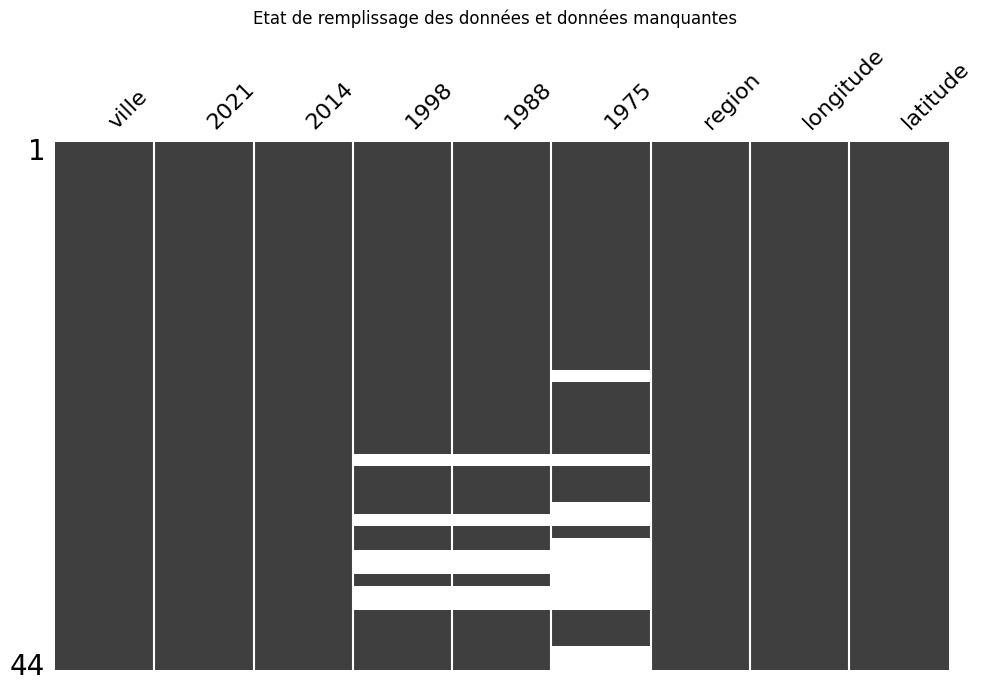

In [ ]:
# afficher les graphes sur le même frame
fig, ax = plt.subplots(1, 1 , figsize=(10,7))
#fig.tight_layout()
fig.suptitle("Etat de remplissage des données et données manquantes")

msno.matrix(table_location_data, ax=ax)
#msno.bar(table_location_data, ax=ax[1])
fig.tight_layout()


Des valeurs manquantes observées pour les années 1988, 1998 et 1975

### **Traitement des données manquantes**

In [ ]:
table_location_data.T

0         1         2               3          4         5   \
ville        Abidjan    Bouaké   Korhogo           Daloa  San-Pédro    Anyama   
2021       5616633.0  832371.0  440926.0        421879.0   390654.0  389592.0   
2014       4395243.0  608138.0  286071.0        319427.0   261616.0  148962.0   
1998       2993440.0  481638.0  164401.0        190719.0   131800.0   79548.0   
1988       1929079.0  326910.0  109439.0        121842.0    70590.0   56690.0   
1975        951216.0  175264.0   45250.0         60837.0    31606.0   26406.0   
region       Abidjan     Gbêkê      Poro  Haut-Sassandra  San-Pédro   Abidjan   
longitude  -4.016107 -5.029841 -5.634247        -6.45161  -6.641549 -4.056921   
latitude    5.320357  7.690606  9.457472         6.87669   4.758159   5.49589   

                     6            7         8         9   ...         34  \
ville      Yamoussoukro         Divo    Gagnoa    Soubré  ...   Gabiadji   
2021           340234.0     294559.0  277044.0  272773.0  ...   113369.0   
2014           281735.0     179455.0  213918.0  175163.0  ...   109933.0   
1998           161354.0     120053.0  123832.0   89182.0  ...        NaN   
1988           106659.0      72329.0   85501.0   32817.0  ...        NaN   
1975            37253.0      35610.0   42285.0    7016.0  ...        NaN   
region     Yamoussoukro  Lôh-Djiboua       Gôh      Nawa  ...  San-Pédro   
longitude     -5.277603    -5.359225  -5.95177 -6.592833  ...  -6.558113   
latitude       6.820007     5.829404  6.132975  5.785267  ...   5.019221   

                     35             36              37              38  \
ville      Grand-Zattry  Zouan-Hounien        Seitifla           Dania   
2021           112049.0       111099.0        109252.0        106612.0   
2014            99343.0        82434.0         93430.0         77295.0   
1998                NaN        13391.0             NaN             NaN   
1988                NaN         6189.0             NaN             NaN   
1975                NaN            NaN             NaN             NaN   
region             Nawa         Tonkpi  Haut-Sassandra  Haut-Sassandra   
longitude     -6.542295      -8.208823       -6.718126       10.333328   
latitude       6.117955       6.918876        7.439267       55.670249   

                   39        40         41        42              43  
ville         Séguéla   Daoukro    Aboisso      Buyo          Saïoua  
2021         103980.0  101136.0   100903.0  100848.0        100085.0  
2014          63774.0   73134.0    86115.0  103217.0         86423.0  
1998          50881.0   41830.0    47343.0   12953.0         15869.0  
1988          29149.0   21735.0    21329.0    7301.0         23076.0  
1975          12692.0   12575.0    13527.0       NaN             NaN  
region     Worodougou     Iffou  Sud-Comoé      Nawa  Haut-Sassandra  
longitude   -6.675572 -3.966069   -3.20761 -7.005726       -6.277999  
latitude     7.966255   7.05794   5.712626  6.250719        6.485348  

[9 rows x 44 columns]

In [ ]:
def set_type(table):

  """
  This function transforms every columns type to the proper type.

  """

  import duckdb as dk
  table = table
  table_location_data = dk.sql(f"SELECT * FROM {table};").df()
  del dk, table

  for i in table_location_data.columns:
    if i in ["ville", "region"]:
      table_location_data[i] = table_location_data[i].astype(str)
    else:
      table_location_data[i] = table_location_data[i].astype(float)

  return table_location_data

N'est il pas possible de créer une classe fille de la classe pandas en ajoutant une méthode, celle qui peut modifier le type des colonnes?

In [ ]:
table_location_data = pd.read_csv("cities-data-and-location.csv")
table_location_data.head()

ville       2021       2014       1998       1988      1975  \
0    Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0   
1     Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0   
2    Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0   
3      Daloa   421879.0   319427.0   190719.0   121842.0   60837.0   
4  San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0   

           region  longitude  latitude  
0         Abidjan  -4.016107  5.320357  
1           Gbêkê  -5.029841  7.690606  
2            Poro  -5.634247  9.457472  
3  Haut-Sassandra  -6.451610  6.876690  
4       San-Pédro  -6.641549  4.758159

In [ ]:
table_location_data.dtypes

ville         object
2021         float64
2014         float64
1998         float64
1988         float64
1975         float64
region        object
longitude    float64
latitude     float64
dtype: object

In [ ]:
def set_str_type(table_link):

  """
  This function transforms every columns type to the proper type.

  """

  table_location_data = pd.read_csv(table_link)
  del table_link

  for i in table_location_data.columns:
    if i in ["ville", "region"]:
      table_location_data[i] = table_location_data[i].astype("string")

  return table_location_data

In [ ]:
table_link = "cities-data-and-location.csv"
table_location_data = set_str_type(table_link)

In [ ]:
table_location_data.dtypes

ville        string[python]
2021                float64
2014                float64
1998                float64
1988                float64
1975                float64
region       string[python]
longitude           float64
latitude            float64
dtype: object

In [ ]:
table_location_data.head()

ville       2021       2014       1998       1988      1975  \
0    Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0   
1     Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0   
2    Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0   
3      Daloa   421879.0   319427.0   190719.0   121842.0   60837.0   
4  San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0   

           region  longitude  latitude  
0         Abidjan  -4.016107  5.320357  
1           Gbêkê  -5.029841  7.690606  
2            Poro  -5.634247  9.457472  
3  Haut-Sassandra  -6.451610  6.876690  
4       San-Pédro  -6.641549  4.758159

In [ ]:
info = ["ville", "2021", "2014", "1998", "1988", "1975"]
table_location_data[info]

ville       2021       2014       1998       1988      1975
0         Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0
1          Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0
2         Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0
3           Daloa   421879.0   319427.0   190719.0   121842.0   60837.0
4       San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0
5          Anyama   389592.0   148962.0    79548.0    56690.0   26406.0
6    Yamoussoukro   340234.0   281735.0   161354.0   106659.0   37253.0
7            Divo   294559.0   179455.0   120053.0    72329.0   35610.0
8          Gagnoa   277044.0   213918.0   123832.0    85501.0   42285.0
9          Soubré   272773.0   175163.0    89182.0    32817.0    7016.0
10            Man   241969.0   188704.0   142187.0    89575.0   50288.0
11        Duékoué   220953.0   185344.0    37374.0    27571.0   13297.0
12        Bouaflé   213967.0   167263.0    76081.0    35750.0   17188.0
13    Bingerville   204656.0    91319.0    35944.0    28752.0   12527.0
14         Guiglo   171454.0   113796.0    64094.0    22328.0    9283.0
15         Lakota   169330.0    77223.0    30154.0    21929.0   12958.0
16     Abengourou   164424.0   135635.0    92821.0    59106.0   30028.0
17          Ferké   160267.0   120150.0    73010.0    35139.0   24662.0
18         Adzopé   156488.0    98846.0   104070.0    36150.0   21147.0
19         Méagui   153483.0   132294.0    18093.0     7648.0       NaN
20      Bondoukou   141568.0   117453.0    44335.0    33325.0   19021.0
21          Dabou   138083.0    88430.0    65453.0    38407.0   23134.0
22         Sinfra   137210.0   130277.0    49297.0    35340.0   17569.0
23      Agboville   135082.0    95093.0    82216.0    46324.0   26914.0
24         Vavoua   132528.0   134651.0    26224.0    22297.0    6957.0
25         Danané   131586.0   104672.0    74344.0    30941.0   19608.0
26   Grand-Béreby   129340.0    98686.0        NaN        NaN       NaN
27           Oumé   127153.0   127850.0    45354.0    28772.0   14032.0
28          Issia   126252.0    85727.0    56844.0    28821.0   10863.0
29   Grand-Bassam   124567.0    84028.0    85093.0    41509.0   27273.0
30      Bloléquin   123133.0    71854.0    24236.0     6608.0       NaN
31        Okrouyo   120053.0   113366.0        NaN        NaN       NaN
32         Bonoua   118388.0    69983.0    31875.0    21436.0   17421.0
33          Bonon   116871.0   112629.0    28140.0    19953.0       NaN
34       Gabiadji   113369.0   109933.0        NaN        NaN       NaN
35   Grand-Zattry   112049.0    99343.0        NaN        NaN       NaN
36  Zouan-Hounien   111099.0    82434.0    13391.0     6189.0       NaN
37       Seitifla   109252.0    93430.0        NaN        NaN       NaN
38          Dania   106612.0    77295.0        NaN        NaN       NaN
39        Séguéla   103980.0    63774.0    50881.0    29149.0   12692.0
40        Daoukro   101136.0    73134.0    41830.0    21735.0   12575.0
41        Aboisso   100903.0    86115.0    47343.0    21329.0   13527.0
42           Buyo   100848.0   103217.0    12953.0     7301.0       NaN
43         Saïoua   100085.0    86423.0    15869.0    23076.0       NaN

In [ ]:
table = table_location_data[info].T
table.columns = table_location_data.ville
table = table.drop(axis=0, index="ville")
display(table)
table1 = table.copy(deep=True)
table2 = table.copy(deep=True)

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

Affichons les 10 villes les plus peuplées et le 11ème en option pour comparaison.

In [ ]:
table

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

In [ ]:
first_city = list(table_location_data.sort_values(by="2021", ascending=False).head(10).ville)

In [ ]:
table[first_city]

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  
2021      340234.0  294559.0  277044.0  272773.0  
2014      281735.0  179455.0  213918.0  175163.0  
1998      161354.0  120053.0  123832.0   89182.0  
1988      106659.0   72329.0   85501.0   32817.0  
1975       37253.0   35610.0   42285.0    7016.0

In [ ]:
ten_first_cities = set(first_city)
all_cities = set(list(table_location_data.ville))
other_cities = [elt for elt in all_cities if elt not in ten_first_cities]
print(other_cities)

['Man', 'Buyo', 'Saïoua', 'Sinfra', 'Gabiadji', 'Dania', 'Agboville', 'Danané', 'Bloléquin', 'Bouaflé', 'Oumé', 'Issia', 'Bondoukou', 'Duékoué', 'Daoukro', 'Vavoua', 'Grand-Zattry', 'Bonon', 'Séguéla', 'Aboisso', 'Guiglo', 'Seitifla', 'Grand-Bassam', 'Ferké', 'Zouan-Hounien', 'Bingerville', 'Dabou', 'Méagui', 'Okrouyo', 'Abengourou', 'Bonoua', 'Adzopé', 'Grand-Béreby', 'Lakota']


In [ ]:
# fonction visualisation_evolution_pop()

def visualisation_evolution_pop(other_city):

  """
  Study the evolution of the cities populations
  """

  # Analyse de l'évolution des populations par ville
  fig, ax = plt.subplot_mosaic("""
                                AABBB
                                """,
                              figsize=(12, 7)
                              )
  sns.lineplot(ax=ax['A'], data=table[first_city].sort_index())

  # création des villes autre que les 10 premières

  first_city_plus_other = first_city.copy()
  first_city_plus_other.append(other_city)
  sns.lineplot(ax=ax['B'], data=table[first_city_plus_other[1:]].sort_index(), palette='husl')


  ax['A'].set_title("Evolution des populations avec Abidjan", fontweight="bold")
  ax['A'].set_ylabel("Population en millions")
  ax['A'].set_xlabel("Années")
  ax['A'].grid()

  ax['B'].set_title("Evolution des populations sans Abidjan", fontweight="bold")
  ax['B'].set_ylabel("Population en milliers")
  ax['B'].set_xlabel("Années")
  ax['B'].grid()

  plt.tight_layout()
  plt.show()


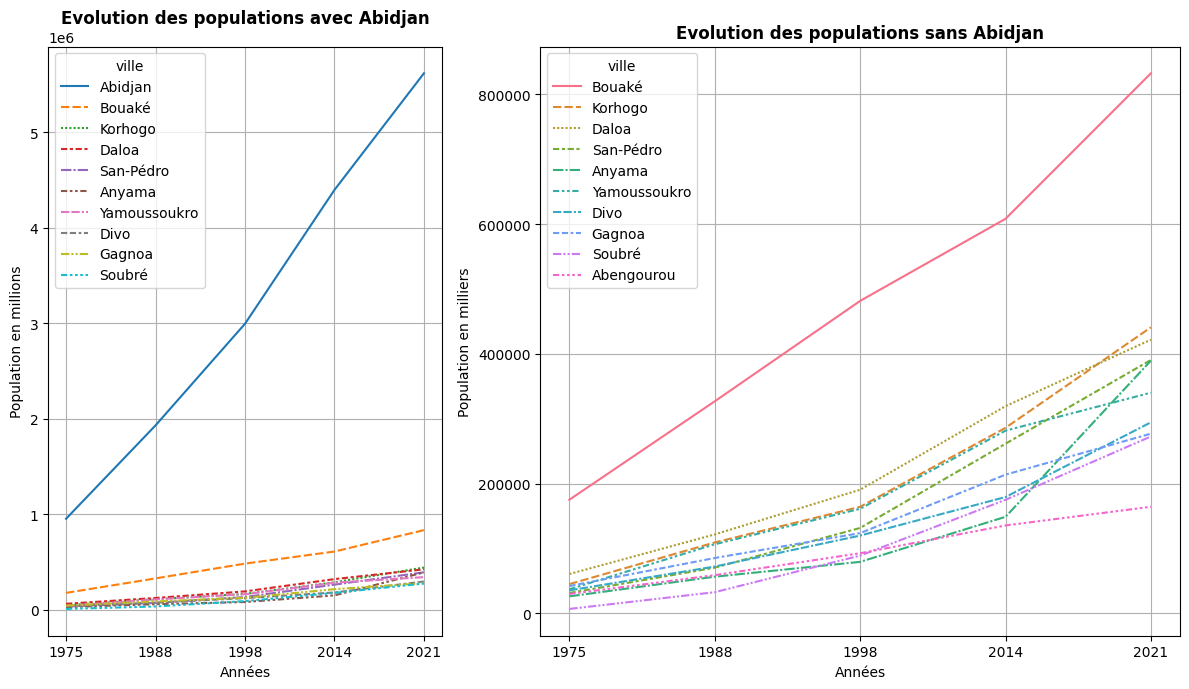

In [ ]:
visualisation_evolution_pop("Abengourou")

In [ ]:
# visualize cities population evolution interactively
def interact_visualisation_evolution_pop(other_cities):

  """
  Important : argument string or list of strings (citie in the studied dataset)
  """
  import ipywidgets as widgets
  option = other_cities
  pop_evolution = widgets.Dropdown(options=option, description='Choisissez une option:')
  pop_evolution.observe(visualisation_evolution_pop)
  display(widgets.interact(visualisation_evolution_pop, other_city=option))


In [ ]:
interact_visualisation_evolution_pop(other_cities)

interactive(children=(Dropdown(description='other_city', options=('Man', 'Buyo', 'Saïoua', 'Sinfra', 'Gabiadji…

<function __main__.visualisation_evolution_pop(other_city)>

In [ ]:
table[first_city]

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  
2021      340234.0  294559.0  277044.0  272773.0  
2014      281735.0  179455.0  213918.0  175163.0  
1998      161354.0  120053.0  123832.0   89182.0  
1988      106659.0   72329.0   85501.0   32817.0  
1975       37253.0   35610.0   42285.0    7016.0

**Observation** : Globalement, les populations augmentent au fil des ans avec Abidjan et Bouaké, les villes les plus peuplées. Les courbes représentatives d'évolution sont plutôt linéaires et croissantes.

In [ ]:
table1 = table1.convert_dtypes()
table2 = table2.convert_dtypes()

In [ ]:
print(table1.dtypes)

ville
Abidjan          Int64
Bouaké           Int64
Korhogo          Int64
Daloa            Int64
San-Pédro        Int64
Anyama           Int64
Yamoussoukro     Int64
Divo             Int64
Gagnoa           Int64
Soubré           Int64
Man              Int64
Duékoué          Int64
Bouaflé          Int64
Bingerville      Int64
Guiglo           Int64
Lakota           Int64
Abengourou       Int64
Ferké            Int64
Adzopé           Int64
Méagui           Int64
Bondoukou        Int64
Dabou            Int64
Sinfra           Int64
Agboville        Int64
Vavoua           Int64
Danané           Int64
Grand-Béreby     Int64
Oumé             Int64
Issia            Int64
Grand-Bassam     Int64
Bloléquin        Int64
Okrouyo          Int64
Bonoua           Int64
Bonon            Int64
Gabiadji         Int64
Grand-Zattry     Int64
Zouan-Hounien    Int64
Seitifla         Int64
Dania            Int64
Séguéla          Int64
Daoukro          Int64
Aboisso          Int64
Buyo             Int64
Saïou

In [ ]:
table.index

Index(['2021', '2014', '1998', '1988', '1975'], dtype='object')

**Tentons d'imputer les valeurs manquantes**

In [ ]:
table

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer2 = KNNImputer(n_neighbors=2)
imputer3 = KNNImputer(n_neighbors=3)



In [ ]:
display(table)
display(pd.DataFrame(imputer2.fit_transform(table2), columns=table2.columns,
             index=table2.index))

display(pd.DataFrame(imputer3.fit_transform(table2), columns=table2.columns,
             index=table2.index))


ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

ville    Abidjan    Bouaké   Korhogo     Daloa  San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0   390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0   261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0   131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0    70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0    31606.0   26406.0   

ville  Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji  \
2021       340234.0  294559.0  277044.0  272773.0  ...  113369.0   
2014       281735.0  179455.0  213918.0  175163.0  ...  109933.0   
1998       161354.0  120053.0  123832.0   89182.0  ...  111651.0   
1988       106659.0   72329.0   85501.0   32817.0  ...  111651.0   
1975        37253.0   35610.0   42285.0    7016.0  ...  111651.0   

ville  Grand-Zattry  Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro  \
2021       112049.0       111099.0  109252.0  106612.0  103980.0  101136.0   
2014        99343.0        82434.0   93430.0   77295.0   63774.0   73134.0   
1998       105696.0        13391.0  101341.0   91953.5   50881.0   41830.0   
1988       105696.0         6189.0  101341.0   91953.5   29149.0   21735.0   
1975       105696.0         9790.0  101341.0   91953.5   12692.0   12575.0   

ville   Aboisso      Buyo    Saïoua  
2021   100903.0  100848.0  100085.0  
2014    86115.0  103217.0   86423.0  
1998    47343.0   12953.0   15869.0  
1988    21329.0    7301.0   23076.0  
1975    13527.0   10127.0   19472.5  

[5 rows x 44 columns]

ville    Abidjan    Bouaké   Korhogo     Daloa  San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0   390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0   261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0   131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0    70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0    31606.0   26406.0   

ville  Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji  \
2021       340234.0  294559.0  277044.0  272773.0  ...  113369.0   
2014       281735.0  179455.0  213918.0  175163.0  ...  109933.0   
1998       161354.0  120053.0  123832.0   89182.0  ...  111651.0   
1988       106659.0   72329.0   85501.0   32817.0  ...  111651.0   
1975        37253.0   35610.0   42285.0    7016.0  ...  111651.0   

ville  Grand-Zattry  Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro  \
2021       112049.0  111099.000000  109252.0  106612.0  103980.0  101136.0   
2014        99343.0   82434.000000   93430.0   77295.0   63774.0   73134.0   
1998       105696.0   13391.000000  101341.0   91953.5   50881.0   41830.0   
1988       105696.0    6189.000000  101341.0   91953.5   29149.0   21735.0   
1975       105696.0   34004.666667  101341.0   91953.5   12692.0   12575.0   

ville   Aboisso      Buyo         Saïoua  
2021   100903.0  100848.0  100085.000000  
2014    86115.0  103217.0   86423.000000  
1998    47343.0   12953.0   15869.000000  
1988    21329.0    7301.0   23076.000000  
1975    13527.0   41157.0   41789.333333  

[5 rows x 44 columns]

In [ ]:
display(table)
pd.DataFrame(imputer.fit_transform(table2), columns=table2.columns,
             index=table2.index)

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

ville    Abidjan    Bouaké   Korhogo     Daloa  San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0   390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0   261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0   131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0    70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0    31606.0   26406.0   

ville  Yamoussoukro      Divo    Gagnoa    Soubré  ...       Gabiadji  \
2021       340234.0  294559.0  277044.0  272773.0  ...  113369.000000   
2014       281735.0  179455.0  213918.0  175163.0  ...  109933.000000   
1998       161354.0  120053.0  123832.0   89182.0  ...  106212.170800   
1988       106659.0   72329.0   85501.0   32817.0  ...  103428.031159   
1975        37253.0   35610.0   42285.0    7016.0  ...  100882.050903   

ville   Grand-Zattry  Zouan-Hounien       Seitifla          Dania   Séguéla  \
2021   112049.000000  111099.000000  109252.000000  106612.000000  103980.0   
2014    99343.000000   82434.000000   93430.000000   77295.000000   63774.0   
1998    85583.728809   13391.000000   76296.426194   45547.750394   50881.0   
1988    75288.246188    6189.000000   63476.095166   21792.621792   29149.0   
1975    65873.454193   -8025.459336   51752.433896      69.540852   12692.0   

ville   Daoukro   Aboisso           Buyo         Saïoua  
2021   101136.0  100903.0  100848.000000  100085.000000  
2014    73134.0   86115.0  103217.000000   86423.000000  
1998    41830.0   47343.0   12953.000000   15869.000000  
1988    21735.0   21329.0    7301.000000   23076.000000  
1975    12575.0   13527.0   -8121.525339   19379.646359  

[5 rows x 44 columns]

In [ ]:
pd.DataFrame(imputer.fit_transform(table2), columns=table2.columns,
             index=table2.index).describe().loc["min"].sort_values()

ville
Méagui           -14419.181140
Bloléquin        -12817.173195
Buyo              -8121.525339
Zouan-Hounien     -8025.459336
Dania                69.540852
Bonon              3364.553116
Vavoua             6957.000000
Soubré             7016.000000
Guiglo             9283.000000
Issia             10863.000000
Bingerville       12527.000000
Daoukro           12575.000000
Séguéla           12692.000000
Lakota            12958.000000
Duékoué           13297.000000
Aboisso           13527.000000
Oumé              14032.000000
Saïoua            15869.000000
Bouaflé           17188.000000
Bonoua            17421.000000
Sinfra            17569.000000
Grand-Béreby      17938.679428
Bondoukou         19021.000000
Danané            19608.000000
Adzopé            21147.000000
Dabou             23134.000000
Ferké             24662.000000
Anyama            26406.000000
Agboville         26914.000000
Grand-Bassam      27273.000000
Abengourou        30028.000000
San-Pédro         31606.000000
Di

Vérification de la distribution des features (populations des ville) à valeurs manquantes

In [ ]:
verif_dist = pd.DataFrame(imputer.fit_transform(table2), columns=table2.columns,
             index=table2.index)


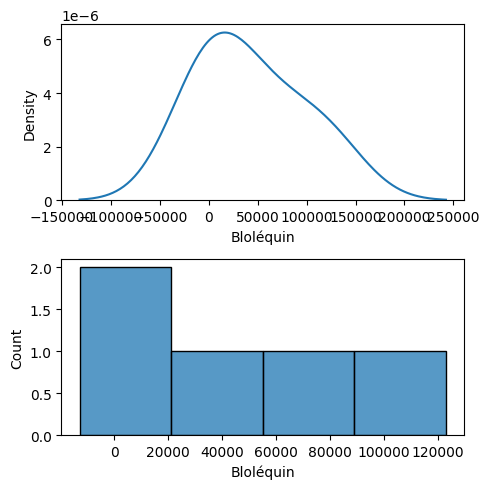

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5))

sns.kdeplot(verif_dist["Bloléquin"], ax=ax[0])
sns.histplot(verif_dist["Bloléquin"], ax=ax[1])

fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

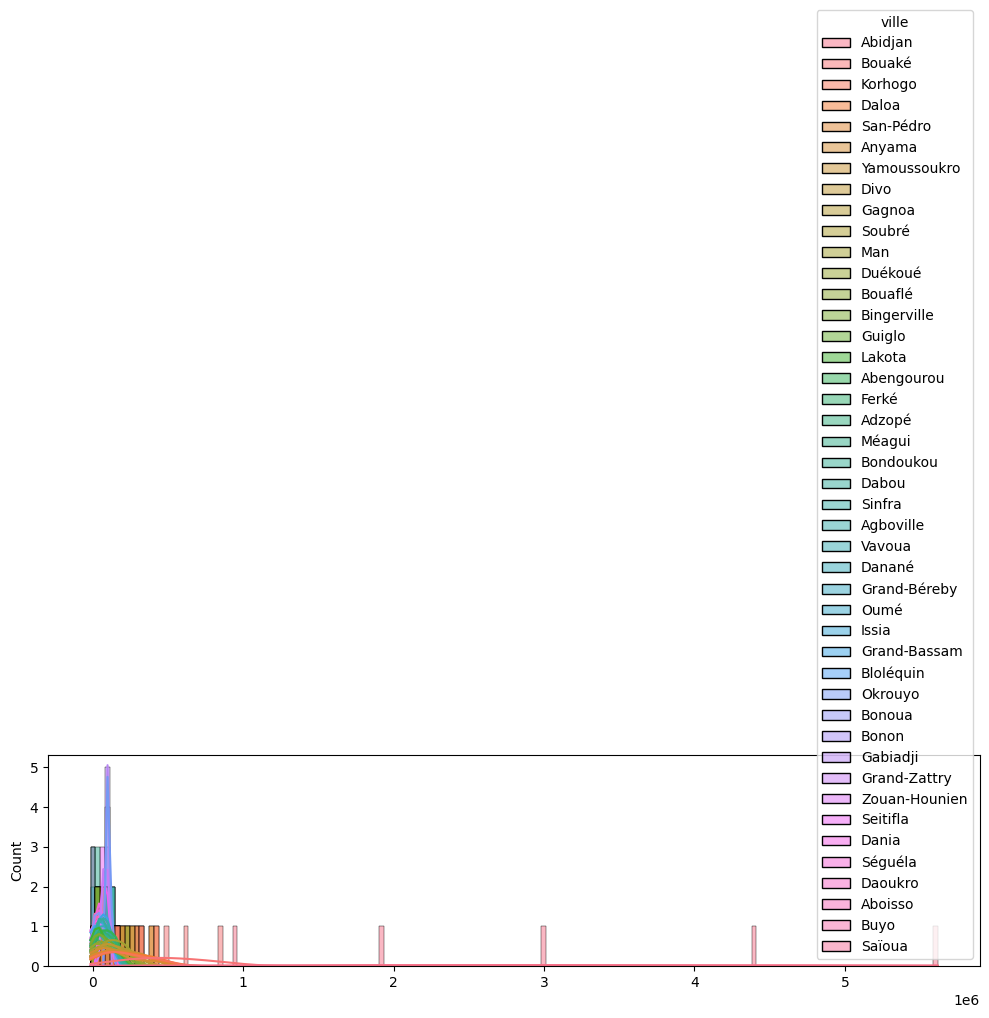

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.histplot(verif_dist, ax=ax, kde=True,
             #x="Bloléquin"
             )

fig.tight_layout()
plt.show()

**Création d'une liste déroulante**

In [ ]:
def dist_pop_ville(ville: str):


  """
  function used for feature distributions displaying
  """
  # verif_dist.columns : faire ressortir uniquement les colonnes de ville \
  # contenant des valeurs manquantes


  try:

    if ville in verif_dist.columns:

      fig, ax = plt.subplots(1, 1, figsize=(10, 7))
      sns.kdeplot(verif_dist, x=f"{ville}", ax=ax,
                  label=f"feature {ville} imputée")

      sns.kdeplot(table, x=f"{ville}", ax=ax,
                  label=f"feature {ville} avec données manquantes" )

      ax.set_title(f"Distribution de la population de {ville}")
      ax.grid(True)
      ax.legend()
      plt.show()

    else:
      raise ValueError("La valeur entrée n'est pas correct, \
            entrez une valeur valide et réessayez...")

  except ValueError:
    print(ValueError)


In [ ]:
options =  verif_dist.columns
ville = widgets.Dropdown(options=options, description='Choisissez une option:')
ville.observe(dist_pop_ville)
display(widgets.interact(dist_pop_ville, ville=options))


interactive(children=(Dropdown(description='ville', options=('Abidjan', 'Bouaké', 'Korhogo', 'Daloa', 'San-Péd…

<function __main__.dist_pop_ville(ville: str)>

In [ ]:

# Créer une liste déroulante pour choisir la colonne
options = verif_dist.columns.tolist()
dropdown = widgets.Dropdown(options=options, description='Colonnes :')

# Définir une fonction pour afficher le graphe en fonction de l'option choisie
def on_change(change):

    if change['type'] == 'change' and change['name'] == 'value':
        fig, ax = plt.subplots(figsize=(10, 7))
        sns.kdeplot(verif_dist[change['new']], ax=ax, label='verif_dist')
        sns.kdeplot(table[change['new']], ax=ax, label='table')
        ax.set_title(f"Distribution de {change['new']}")
        ax.grid(True)
        ax.legend()
        plt.show()

# Appliquer la fonction à la liste déroulante
dropdown.observe(on_change)
display(dropdown)

Dropdown(description='Colonnes :', options=('Abidjan', 'Bouaké', 'Korhogo', 'Daloa', 'San-Pédro', 'Anyama', 'Y…

In [ ]:
verif_dist.columns

Index(['Abidjan', 'Bouaké', 'Korhogo', 'Daloa', 'San-Pédro', 'Anyama',
       'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubré', 'Man', 'Duékoué', 'Bouaflé',
       'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferké', 'Adzopé',
       'Méagui', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua',
       'Danané', 'Grand-Béreby', 'Oumé', 'Issia', 'Grand-Bassam', 'Bloléquin',
       'Okrouyo', 'Bonoua', 'Bonon', 'Gabiadji', 'Grand-Zattry',
       'Zouan-Hounien', 'Seitifla', 'Dania', 'Séguéla', 'Daoukro', 'Aboisso',
       'Buyo', 'Saïoua'],
      dtype='string', name='ville')

On peut apparaitre des valeurs d'imputation négatives ce qu'il faudrait corriger. Cependant notons que la visualisation de l'évolution de la popuplation est possible quand bien même il y a des valeurs manquantes: ceci pour la population il était possible de se passer de l'imputation.

In [ ]:
table

ville    Abidjan    Bouaké   Korhogo     Daloa San-Pédro    Anyama  \
2021   5616633.0  832371.0  440926.0  421879.0  390654.0  389592.0   
2014   4395243.0  608138.0  286071.0  319427.0  261616.0  148962.0   
1998   2993440.0  481638.0  164401.0  190719.0  131800.0   79548.0   
1988   1929079.0  326910.0  109439.0  121842.0   70590.0   56690.0   
1975    951216.0  175264.0   45250.0   60837.0   31606.0   26406.0   

ville Yamoussoukro      Divo    Gagnoa    Soubré  ...  Gabiadji Grand-Zattry  \
2021      340234.0  294559.0  277044.0  272773.0  ...  113369.0     112049.0   
2014      281735.0  179455.0  213918.0  175163.0  ...  109933.0      99343.0   
1998      161354.0  120053.0  123832.0   89182.0  ...       NaN          NaN   
1988      106659.0   72329.0   85501.0   32817.0  ...       NaN          NaN   
1975       37253.0   35610.0   42285.0    7016.0  ...       NaN          NaN   

ville Zouan-Hounien  Seitifla     Dania   Séguéla   Daoukro   Aboisso  \
2021       111099.0  109252.0  106612.0  103980.0  101136.0  100903.0   
2014        82434.0   93430.0   77295.0   63774.0   73134.0   86115.0   
1998        13391.0       NaN       NaN   50881.0   41830.0   47343.0   
1988         6189.0       NaN       NaN   29149.0   21735.0   21329.0   
1975            NaN       NaN       NaN   12692.0   12575.0   13527.0   

ville      Buyo    Saïoua  
2021   100848.0  100085.0  
2014   103217.0   86423.0  
1998    12953.0   15869.0  
1988     7301.0   23076.0  
1975        NaN       NaN  

[5 rows x 44 columns]

In [ ]:

# Fonction appelée lorsque la liste déroulante est modifiée
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_option = change['new']
        print(f'Option sélectionnée : {selected_option}')

# Options de la liste déroulante
options = ['Option 1', 'Option 2', 'Option 3']

# Création de la liste déroulante
dropdown = widgets.Dropdown(options=options, description='Choisissez une option:')

# Liason de la fonction avec le changement de la liste déroulante
dropdown.observe(on_dropdown_change)

# Affichage de la liste déroulante
display(dropdown)


Dropdown(description='Choisissez une option:', options=('Option 1', 'Option 2', 'Option 3'), value='Option 1')

Il faudra s'intéresser aux données de chaque ville, ce qui permettra de comprendre l'évolution par an, dans le mois et les moyennes des caractéristiques.

In [ ]:
nasa_data = pd.read_csv("nasa-renewable-energy-data.csv")
display(nasa_data)


parameters    ville  201301  201302  201303  201304  201305  \
0                   QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                   RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2              ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3              CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4              CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
..                   ...      ...     ...     ...     ...     ...     ...   
787    CLRSKY_SFC_SW_DWN   Saïoua    5.70    5.90    6.56    6.78    6.62   
788   ALLSKY_SFC_PAR_TOT   Saïoua  100.68   94.80  103.46  110.48   99.66   
789   ALLSKY_SFC_SW_DIFF   Saïoua    2.11    2.62    2.70    2.96    2.86   
790   CLRSKY_SFC_PAR_TOT   Saïoua  105.16  110.02  125.08  130.58  127.62   
791  ALLSKY_SFC_UV_INDEX   Saïoua -999.00 -999.00 -999.00 -999.00 -999.00   

     201306  201307  201308  ...  202204  202205  202206  202207  202208  \
0     17.70   16.48   15.62  ...   18.80   18.92   18.07   16.85   16.42   
1     87.81   87.31   83.88  ...   85.19   87.31   87.19   86.88   89.06   
2      0.45    0.41    0.41  ...    0.49    0.48    0.43    0.45    0.41   
3     64.90   67.38   62.77  ...   76.53   75.40   75.05   62.77   71.47   
4      0.65    0.66    0.65  ...    0.65    0.65    0.65    0.66    0.66   
..      ...     ...     ...  ...     ...     ...     ...     ...     ...   
787    6.36    6.60    6.72  ...    6.67    6.45    6.44    6.56    6.88   
788   86.20   74.94   78.01  ...  101.76   92.40   88.54   79.91   74.45   
789    2.65    2.50    2.55  ...    3.11    2.91    2.85    2.60    2.53   
790  122.45  127.09  128.53  ...  127.71  124.23  123.78  126.12  132.34   
791 -999.00 -999.00 -999.00  ... -999.00 -999.00 -999.00 -999.00 -999.00   

     202209  202210  202211  202212  202213  
0     17.21   18.31   18.31   17.46   17.82  
1     89.19   87.50   85.19   82.31   85.19  
2      0.39    0.48    0.52    0.52    0.47  
3     76.45   69.23   68.46   44.55   65.27  
4      0.69    0.66    0.65    0.60    0.63  
..      ...     ...     ...     ...     ...  
787    6.99    6.52    5.94    5.47    6.26  
788   84.74   90.27   88.84   89.28   88.72  
789    2.68    2.64    2.40    2.28    2.67  
790  135.18  125.91  112.86  101.31  118.88  
791 -999.00 -999.00 -999.00 -999.00 -999.00  

[792 rows x 132 columns]

Toutes les valeurs du parametre ALLSKY_SFC_UV_INDEX sont des valeurs manquantes.

In [ ]:
nasa_data.dtypes

parameters     object
ville          object
201301        float64
201302        float64
201303        float64
               ...   
202209        float64
202210        float64
202211        float64
202212        float64
202213        float64
Length: 132, dtype: object

In [ ]:
# changement des types des colonnes parameters et ville
nasa_data.parameters = nasa_data.parameters.astype("string")
nasa_data.ville = nasa_data.ville.astype("string")

In [ ]:
nasa_data.dtypes

parameters    string[python]
ville         string[python]
201301               float64
201302               float64
201303               float64
                   ...      
202209               float64
202210               float64
202211               float64
202212               float64
202213               float64
Length: 132, dtype: object

In [ ]:
# nasa_data = dk.sql("SELECT * \
 #                   FROM nasa_data \
  #                  WHERE ville = 'Abidjan' \
   #                 ")

# cannot display because this one
#   InvalidInputException: Invalid Input Error: Attempting to execute an unsuccessful or closed pending query result
#Error: Binder Error: Max expression depth limit of 1000 exceeded. Use "SET max_expression_depth TO x" to increase the maximum expression depth.

In [ ]:
nasa_data.head(36)

parameters    ville  201301  201302  201303  201304  201305  \
0                  QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                  RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2             ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3             CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4             CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
5            TOA_SW_DWN  Abidjan    9.44    9.99   10.39   10.38   10.07   
6           PRECTOTCORR  Abidjan    0.00    0.00    5.27    5.27   10.55   
7        ALLSKY_SFC_UVA  Abidjan   11.84   11.38   13.13   14.30   11.98   
8        ALLSKY_SFC_UVB  Abidjan    0.33    0.31    0.38    0.41    0.34   
9        ALLSKY_SRF_ALB  Abidjan    0.15    0.16    0.16    0.16    0.16   
10      PRECTOTCORR_SUM  Abidjan    0.00   36.91  105.47  152.93  305.86   
11    ALLSKY_SFC_SW_DNI  Abidjan    4.23    3.08    3.36    3.56    2.64   
12    ALLSKY_SFC_SW_DWN  Abidjan    5.34    5.09    5.34    5.56    4.64   
13    CLRSKY_SFC_SW_DWN  Abidjan    5.68    5.84    6.61    6.92    6.55   
14   ALLSKY_SFC_PAR_TOT  Abidjan   98.88   95.52  103.86  109.33   91.40   
15   ALLSKY_SFC_SW_DIFF  Abidjan    2.39    2.84    2.83    2.89    2.71   
16   CLRSKY_SFC_PAR_TOT  Abidjan  105.31  109.23  126.68  134.48  127.20   
17  ALLSKY_SFC_UV_INDEX  Abidjan -999.00 -999.00 -999.00 -999.00 -999.00   
18                 QV2M   Bouaké    9.28   13.24   17.70   17.70   18.07   
19                 RH2M   Bouaké   45.25   55.31   76.06   76.81   83.06   
20            ALLSKY_KT   Bouaké    0.59    0.53    0.52    0.55    0.52   
21            CLOUD_AMT   Bouaké   22.12   42.19   64.01   63.66   70.59   
22            CLRSKY_KT   Bouaké    0.62    0.59    0.63    0.65    0.66   
23           TOA_SW_DWN   Bouaké    9.21    9.83   10.33   10.44   10.22   
24          PRECTOTCORR   Bouaké    0.00    0.00    5.27    5.27    5.27   
25       ALLSKY_SFC_UVA   Bouaké   11.95   11.72   12.91   14.30   13.17   
26       ALLSKY_SFC_UVB   Bouaké    0.33    0.33    0.38    0.41    0.38   
27       ALLSKY_SRF_ALB   Bouaké    0.11    0.12    0.15    0.14    0.16   
28      PRECTOTCORR_SUM   Bouaké    0.00   47.46  147.66  100.20  226.76   
29    ALLSKY_SFC_SW_DNI   Bouaké    4.90    3.59    3.48    3.61    2.91   
30    ALLSKY_SFC_SW_DWN   Bouaké    5.44    5.25    5.33    5.75    5.25   
31    CLRSKY_SFC_SW_DWN   Bouaké    5.65    5.87    6.55    6.80    6.67   
32   ALLSKY_SFC_PAR_TOT   Bouaké   99.37   97.55  102.79  111.95  102.14   
33   ALLSKY_SFC_SW_DIFF   Bouaké    2.08    2.64    2.73    3.01    3.09   
34   CLRSKY_SFC_PAR_TOT   Bouaké  103.55  108.55  124.55  130.72  128.48   
35  ALLSKY_SFC_UV_INDEX   Bouaké -999.00 -999.00 -999.00 -999.00 -999.00   

    201306  201307  201308  ...  202204  202205  202206  202207  202208  \
0    17.70   16.48   15.62  ...   18.80   18.92   18.07   16.85   16.42   
1    87.81   87.31   83.88  ...   85.19   87.31   87.19   86.88   89.06   
2     0.45    0.41    0.41  ...    0.49    0.48    0.43    0.45    0.41   
3    64.90   67.38   62.77  ...   76.53   75.40   75.05   62.77   71.47   
4     0.65    0.66    0.65  ...    0.65    0.65    0.65    0.66    0.66   
5     9.84    9.90   10.17  ...   10.38   10.08    9.84    9.90   10.17   
6     5.27    0.00    0.00  ...    5.69    7.84   13.76    3.91    2.48   
7    11.12   10.70   10.75  ...   12.89   12.23   10.95   11.28   10.86   
8     0.30    0.28    0.29  ...    0.39    0.36    0.31    0.32    0.31   
9     0.18    0.16    0.16  ...    0.16    0.16    0.16    0.15    0.16   
10  174.02   52.73   10.55  ...  170.68  243.07  412.72  121.06   76.76   
11    2.52    2.41    2.42  ...    2.80    2.53    2.31    2.65    2.28   
12    4.37    4.12    4.23  ...    5.09    4.77    4.26    4.38    4.16   
13    6.38    6.52    6.63  ...    6.73    6.56    6.37    6.53    6.78   
14   85.37   80.68   82.54  ...   99.39   93.44   83.12   85.47   81.23   


In [ ]:
nasa_data.query("parameters == 'ALLSKY_SFC_UV_INDEX'")

parameters          ville  201301  201302  201303  201304  \
17   ALLSKY_SFC_UV_INDEX        Abidjan  -999.0  -999.0  -999.0  -999.0   
35   ALLSKY_SFC_UV_INDEX         Bouaké  -999.0  -999.0  -999.0  -999.0   
53   ALLSKY_SFC_UV_INDEX        Korhogo  -999.0  -999.0  -999.0  -999.0   
71   ALLSKY_SFC_UV_INDEX          Daloa  -999.0  -999.0  -999.0  -999.0   
89   ALLSKY_SFC_UV_INDEX      San-Pédro  -999.0  -999.0  -999.0  -999.0   
107  ALLSKY_SFC_UV_INDEX         Anyama  -999.0  -999.0  -999.0  -999.0   
125  ALLSKY_SFC_UV_INDEX   Yamoussoukro  -999.0  -999.0  -999.0  -999.0   
143  ALLSKY_SFC_UV_INDEX           Divo  -999.0  -999.0  -999.0  -999.0   
161  ALLSKY_SFC_UV_INDEX         Gagnoa  -999.0  -999.0  -999.0  -999.0   
179  ALLSKY_SFC_UV_INDEX         Soubré  -999.0  -999.0  -999.0  -999.0   
197  ALLSKY_SFC_UV_INDEX            Man  -999.0  -999.0  -999.0  -999.0   
215  ALLSKY_SFC_UV_INDEX        Duékoué  -999.0  -999.0  -999.0  -999.0   
233  ALLSKY_SFC_UV_INDEX        Bouaflé  -999.0  -999.0  -999.0  -999.0   
251  ALLSKY_SFC_UV_INDEX    Bingerville  -999.0  -999.0  -999.0  -999.0   
269  ALLSKY_SFC_UV_INDEX         Guiglo  -999.0  -999.0  -999.0  -999.0   
287  ALLSKY_SFC_UV_INDEX         Lakota  -999.0  -999.0  -999.0  -999.0   
305  ALLSKY_SFC_UV_INDEX     Abengourou  -999.0  -999.0  -999.0  -999.0   
323  ALLSKY_SFC_UV_INDEX          Ferké  -999.0  -999.0  -999.0  -999.0   
341  ALLSKY_SFC_UV_INDEX         Adzopé  -999.0  -999.0  -999.0  -999.0   
359  ALLSKY_SFC_UV_INDEX         Méagui  -999.0  -999.0  -999.0  -999.0   
377  ALLSKY_SFC_UV_INDEX      Bondoukou  -999.0  -999.0  -999.0  -999.0   
395  ALLSKY_SFC_UV_INDEX          Dabou  -999.0  -999.0  -999.0  -999.0   
413  ALLSKY_SFC_UV_INDEX         Sinfra  -999.0  -999.0  -999.0  -999.0   
431  ALLSKY_SFC_UV_INDEX      Agboville  -999.0  -999.0  -999.0  -999.0   
449  ALLSKY_SFC_UV_INDEX         Vavoua  -999.0  -999.0  -999.0  -999.0   
467  ALLSKY_SFC_UV_INDEX         Danané  -999.0  -999.0  -999.0  -999.0   
485  ALLSKY_SFC_UV_INDEX   Grand-Béreby  -999.0  -999.0  -999.0  -999.0   
503  ALLSKY_SFC_UV_INDEX           Oumé  -999.0  -999.0  -999.0  -999.0   
521  ALLSKY_SFC_UV_INDEX          Issia  -999.0  -999.0  -999.0  -999.0   
539  ALLSKY_SFC_UV_INDEX   Grand-Bassam  -999.0  -999.0  -999.0  -999.0   
557  ALLSKY_SFC_UV_INDEX      Bloléquin  -999.0  -999.0  -999.0  -999.0   
575  ALLSKY_SFC_UV_INDEX        Okrouyo  -999.0  -999.0  -999.0  -999.0   
593  ALLSKY_SFC_UV_INDEX         Bonoua  -999.0  -999.0  -999.0  -999.0   
611  ALLSKY_SFC_UV_INDEX          Bonon  -999.0  -999.0  -999.0  -999.0   
629  ALLSKY_SFC_UV_INDEX       Gabiadji  -999.0  -999.0  -999.0  -999.0   
647  ALLSKY_SFC_UV_INDEX   Grand-Zattry  -999.0  -999.0  -999.0  -999.0   
665  ALLSKY_SFC_UV_INDEX  Zouan-Hounien  -999.0  -999.0  -999.0  -999.0   
683  ALLSKY_SFC_UV_INDEX       Seitifla  -999.0  -999.0  -999.0  -999.0   
701  ALLSKY_SFC_UV_INDEX          Dania  -999.0  -999.0  -999.0  -999.0   
719  ALLSKY_SFC_UV_INDEX        Séguéla  -999.0  -999.0  -999.0  -999.0   
737  ALLSKY_SFC_UV_INDEX        Daoukro  -999.0  -999.0  -999.0  -999.0   
755  ALLSKY_SFC_UV_INDEX        Aboisso  -999.0  -999.0  -999.0  -999.0   
773  ALLSKY_SFC_UV_INDEX           Buyo  -999.0  -999.0  -999.0  -999.0   
791  ALLSKY_SFC_UV_INDEX         Saïoua  -999.0  -999.0  -999.0  -999.0   

     201305  201306  201307  201308  ...  202204  202205  202206  202207  \
17   -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
35   -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
53   -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
71   -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
89   -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
107  -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
125  -999.0  -999.0  -999.0  -999.0  ...  -999.0  -999.0  -999.0  -999.0   
143  -999.0  -999.0  -999.0  -

In [ ]:
nasa_data.query("parameters != 'ALLSKY_SFC_UV_INDEX'", inplace=True)
nasa_data

parameters    ville  201301  201302  201303  201304  201305  \
0                  QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                  RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2             ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3             CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4             CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
..                  ...      ...     ...     ...     ...     ...     ...   
786   ALLSKY_SFC_SW_DWN   Saïoua    5.46    5.05    5.36    5.68    5.11   
787   CLRSKY_SFC_SW_DWN   Saïoua    5.70    5.90    6.56    6.78    6.62   
788  ALLSKY_SFC_PAR_TOT   Saïoua  100.68   94.80  103.46  110.48   99.66   
789  ALLSKY_SFC_SW_DIFF   Saïoua    2.11    2.62    2.70    2.96    2.86   
790  CLRSKY_SFC_PAR_TOT   Saïoua  105.16  110.02  125.08  130.58  127.62   

     201306  201307  201308  ...  202204  202205  202206  202207  202208  \
0     17.70   16.48   15.62  ...   18.80   18.92   18.07   16.85   16.42   
1     87.81   87.31   83.88  ...   85.19   87.31   87.19   86.88   89.06   
2      0.45    0.41    0.41  ...    0.49    0.48    0.43    0.45    0.41   
3     64.90   67.38   62.77  ...   76.53   75.40   75.05   62.77   71.47   
4      0.65    0.66    0.65  ...    0.65    0.65    0.65    0.66    0.66   
..      ...     ...     ...  ...     ...     ...     ...     ...     ...   
786    4.38    3.79    3.97  ...    5.25    4.74    4.55    4.08    3.78   
787    6.36    6.60    6.72  ...    6.67    6.45    6.44    6.56    6.88   
788   86.20   74.94   78.01  ...  101.76   92.40   88.54   79.91   74.45   
789    2.65    2.50    2.55  ...    3.11    2.91    2.85    2.60    2.53   
790  122.45  127.09  128.53  ...  127.71  124.23  123.78  126.12  132.34   

     202209  202210  202211  202212  202213  
0     17.21   18.31   18.31   17.46   17.82  
1     89.19   87.50   85.19   82.31   85.19  
2      0.39    0.48    0.52    0.52    0.47  
3     76.45   69.23   68.46   44.55   65.27  
4      0.69    0.66    0.65    0.60    0.63  
..      ...     ...     ...     ...     ...  
786    4.28    4.60    4.65    4.82    4.63  
787    6.99    6.52    5.94    5.47    6.26  
788   84.74   90.27   88.84   89.28   88.72  
789    2.68    2.64    2.40    2.28    2.67  
790  135.18  125.91  112.86  101.31  118.88  

[748 rows x 132 columns]

In [ ]:
nasa_data.head(34)

parameters    ville  201301  201302  201303  201304  201305  \
0                 QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                 RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2            ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3            CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4            CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
5           TOA_SW_DWN  Abidjan    9.44    9.99   10.39   10.38   10.07   
6          PRECTOTCORR  Abidjan    0.00    0.00    5.27    5.27   10.55   
7       ALLSKY_SFC_UVA  Abidjan   11.84   11.38   13.13   14.30   11.98   
8       ALLSKY_SFC_UVB  Abidjan    0.33    0.31    0.38    0.41    0.34   
9       ALLSKY_SRF_ALB  Abidjan    0.15    0.16    0.16    0.16    0.16   
10     PRECTOTCORR_SUM  Abidjan    0.00   36.91  105.47  152.93  305.86   
11   ALLSKY_SFC_SW_DNI  Abidjan    4.23    3.08    3.36    3.56    2.64   
12   ALLSKY_SFC_SW_DWN  Abidjan    5.34    5.09    5.34    5.56    4.64   
13   CLRSKY_SFC_SW_DWN  Abidjan    5.68    5.84    6.61    6.92    6.55   
14  ALLSKY_SFC_PAR_TOT  Abidjan   98.88   95.52  103.86  109.33   91.40   
15  ALLSKY_SFC_SW_DIFF  Abidjan    2.39    2.84    2.83    2.89    2.71   
16  CLRSKY_SFC_PAR_TOT  Abidjan  105.31  109.23  126.68  134.48  127.20   
18                QV2M   Bouaké    9.28   13.24   17.70   17.70   18.07   
19                RH2M   Bouaké   45.25   55.31   76.06   76.81   83.06   
20           ALLSKY_KT   Bouaké    0.59    0.53    0.52    0.55    0.52   
21           CLOUD_AMT   Bouaké   22.12   42.19   64.01   63.66   70.59   
22           CLRSKY_KT   Bouaké    0.62    0.59    0.63    0.65    0.66   
23          TOA_SW_DWN   Bouaké    9.21    9.83   10.33   10.44   10.22   
24         PRECTOTCORR   Bouaké    0.00    0.00    5.27    5.27    5.27   
25      ALLSKY_SFC_UVA   Bouaké   11.95   11.72   12.91   14.30   13.17   
26      ALLSKY_SFC_UVB   Bouaké    0.33    0.33    0.38    0.41    0.38   
27      ALLSKY_SRF_ALB   Bouaké    0.11    0.12    0.15    0.14    0.16   
28     PRECTOTCORR_SUM   Bouaké    0.00   47.46  147.66  100.20  226.76   
29   ALLSKY_SFC_SW_DNI   Bouaké    4.90    3.59    3.48    3.61    2.91   
30   ALLSKY_SFC_SW_DWN   Bouaké    5.44    5.25    5.33    5.75    5.25   
31   CLRSKY_SFC_SW_DWN   Bouaké    5.65    5.87    6.55    6.80    6.67   
32  ALLSKY_SFC_PAR_TOT   Bouaké   99.37   97.55  102.79  111.95  102.14   
33  ALLSKY_SFC_SW_DIFF   Bouaké    2.08    2.64    2.73    3.01    3.09   
34  CLRSKY_SFC_PAR_TOT   Bouaké  103.55  108.55  124.55  130.72  128.48   

    201306  201307  201308  ...  202204  202205  202206  202207  202208  \
0    17.70   16.48   15.62  ...   18.80   18.92   18.07   16.85   16.42   
1    87.81   87.31   83.88  ...   85.19   87.31   87.19   86.88   89.06   
2     0.45    0.41    0.41  ...    0.49    0.48    0.43    0.45    0.41   
3    64.90   67.38   62.77  ...   76.53   75.40   75.05   62.77   71.47   
4     0.65    0.66    0.65  ...    0.65    0.65    0.65    0.66    0.66   
5     9.84    9.90   10.17  ...   10.38   10.08    9.84    9.90   10.17   
6     5.27    0.00    0.00  ...    5.69    7.84   13.76    3.91    2.48   
7    11.12   10.70   10.75  ...   12.89   12.23   10.95   11.28   10.86   
8     0.30    0.28    0.29  ...    0.39    0.36    0.31    0.32    0.31   
9     0.18    0.16    0.16  ...    0.16    0.16    0.16    0.15    0.16   
10  174.02   52.73   10.55  ...  170.68  243.07  412.72  121.06   76.76   
11    2.52    2.41    2.42  ...    2.80    2.53    2.31    2.65    2.28   
12    4.37    4.12    4.23  ...    5.09    4.77    4.26    4.38    4.16   
13    6.38    6.52    6.63  ...    6.73    6.56    6.37    6.53    6.78   
14   85.37   80.68   82.54  ...   99.39   93.44   83.12   85.47   81.23   
15    2.58    2.50    2.59  ...    2.98    2.91    2.61    2.56    2.57   
16  123.06  125.45  126.20  ...  129.83  127.41  122.87  125.68  129.82   
18   17.52   16.42   15.38  ...   17

In [ ]:
# Réinitialiser l'index à l'index par défaut
nasa_data.reset_index(drop=True, inplace=True)
nasa_data


parameters    ville  201301  201302  201303  201304  201305  \
0                  QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                  RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2             ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3             CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4             CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    5.46    5.05    5.36    5.68    5.11   
744   CLRSKY_SFC_SW_DWN   Saïoua    5.70    5.90    6.56    6.78    6.62   
745  ALLSKY_SFC_PAR_TOT   Saïoua  100.68   94.80  103.46  110.48   99.66   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.11    2.62    2.70    2.96    2.86   
747  CLRSKY_SFC_PAR_TOT   Saïoua  105.16  110.02  125.08  130.58  127.62   

     201306  201307  201308  ...  202204  202205  202206  202207  202208  \
0     17.70   16.48   15.62  ...   18.80   18.92   18.07   16.85   16.42   
1     87.81   87.31   83.88  ...   85.19   87.31   87.19   86.88   89.06   
2      0.45    0.41    0.41  ...    0.49    0.48    0.43    0.45    0.41   
3     64.90   67.38   62.77  ...   76.53   75.40   75.05   62.77   71.47   
4      0.65    0.66    0.65  ...    0.65    0.65    0.65    0.66    0.66   
..      ...     ...     ...  ...     ...     ...     ...     ...     ...   
743    4.38    3.79    3.97  ...    5.25    4.74    4.55    4.08    3.78   
744    6.36    6.60    6.72  ...    6.67    6.45    6.44    6.56    6.88   
745   86.20   74.94   78.01  ...  101.76   92.40   88.54   79.91   74.45   
746    2.65    2.50    2.55  ...    3.11    2.91    2.85    2.60    2.53   
747  122.45  127.09  128.53  ...  127.71  124.23  123.78  126.12  132.34   

     202209  202210  202211  202212  202213  
0     17.21   18.31   18.31   17.46   17.82  
1     89.19   87.50   85.19   82.31   85.19  
2      0.39    0.48    0.52    0.52    0.47  
3     76.45   69.23   68.46   44.55   65.27  
4      0.69    0.66    0.65    0.60    0.63  
..      ...     ...     ...     ...     ...  
743    4.28    4.60    4.65    4.82    4.63  
744    6.99    6.52    5.94    5.47    6.26  
745   84.74   90.27   88.84   89.28   88.72  
746    2.68    2.64    2.40    2.28    2.67  
747  135.18  125.91  112.86  101.31  118.88  

[748 rows x 132 columns]

### Séparation des données annuelles aux données mensuelles


In [ ]:
# séparation des données anuelles aux données mensuelles

def list_feat_annuelle(data):

   """
   data : DataFrame
   fonction pour définir les colonnes de années annuelles type 'YYYYMM'

   """

   year_inf = int(data.columns[2][:-2])
   year_sup = int(data.columns[-1][:-2])

   years_list = [] # include years needed
   for i in np.arange(year_inf, year_sup + 1):
    years_list.append(str(i) + "13")

   return years_list


In [ ]:
years_list = list_feat_annuelle(nasa_data)
annual_feat = ["parameters", "ville"]
annual_feat.extend(years_list) # include years needed

# create set instances
all_data_columns_set = set(nasa_data.columns[2:])
years_list_set = set(years_list)

monthly_feat = [elt for elt in all_data_columns_set \
                    if elt not in years_list_set]


In [ ]:
print(monthly_feat)


['202205', '201904', '202004', '201808', '201509', '201306', '201305', '201403', '201302', '201508', '201905', '202005', '201310', '201812', '201608', '201711', '202001', '201907', '202206', '201501', '201303', '202112', '201512', '201612', '201410', '201712', '201806', '202010', '201607', '201301', '202012', '201804', '201805', '202203', '201406', '202007', '201609', '201610', '201603', '201903', '201506', '201507', '201504', '201307', '201811', '202202', '202009', '201408', '201304', '201503', '201412', '201703', '201910', '201901', '201605', '201803', '201709', '201807', '201510', '202107', '201401', '201710', '202101', '201402', '202111', '202110', '201908', '202105', '201602', '201502', '201405', '202104', '201311', '201601', '201704', '201706', '201407', '202108', '201404', '201810', '201809', '201604', '202212', '201409', '201701', '202103', '202211', '202008', '202204', '202207', '202210', '202209', '201708', '201702', '202106', '201802', '202201', '202208', '201505', '201909',

In [ ]:
nasa_data[monthly_feat]


202205  201904  202004  201808  201509  201306  201305  201403  201302  \
0     18.92   19.71   19.41   16.48   16.78   17.70   18.86   18.37   17.88   
1     87.31   86.06   85.38   85.31   85.19   87.81   87.75   83.50   77.25   
2      0.48    0.50    0.52    0.48    0.41    0.45    0.46    0.50    0.51   
3     75.40   76.07   68.41   58.58   59.58   64.90   74.20   65.70   49.80   
4      0.65    0.64    0.65    0.68    0.67    0.65    0.65    0.62    0.59   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
743    4.74    5.35    5.16    4.32    4.31    4.38    5.11    5.24    5.05   
744    6.45    6.61    6.52    6.88    6.81    6.36    6.62    6.40    5.90   
745   92.40  103.52   99.34   85.34   85.30   86.20   99.66  100.49   94.80   
746    2.91    3.06    3.02    2.75    2.62    2.65    2.86    2.83    2.62   
747  124.23  126.22  124.02  132.52  131.21  122.45  127.62  121.01  110.02   

     201508  ...  202002  202011  201308  201902  201801  201906  201912  \
0     16.72  ...   17.64   18.49   15.62   18.19   17.33   18.31   18.13   
1     88.44  ...   73.00   85.94   83.88   77.19   79.94   88.56   81.50   
2      0.41  ...    0.47    0.49    0.41    0.49    0.53    0.41    0.53   
3     67.88  ...   41.95   63.52   62.77   52.46   28.54   73.00   39.00   
4      0.66  ...    0.53    0.63    0.65    0.57    0.57    0.66    0.61   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
743    3.93  ...    5.06    4.53    3.97    5.17    5.00    4.24    4.69   
744    6.71  ...    5.58    5.86    6.72    5.80    5.33    6.53    5.40   
745   77.52  ...   93.03   86.41   78.01   97.10   92.04   83.49   87.36   
746    2.60  ...    2.57    2.38    2.55    2.47    2.37    2.75    2.28   
747  128.60  ...  102.22  111.20  128.53  108.46   98.05  126.34  100.51   

     201312  202109  201411  
0     16.78   18.01   18.13  
1     79.00   89.56   84.38  
2      0.53    0.45    0.52  
3     35.75   76.29   50.83  
4      0.60    0.66    0.66  
..      ...     ...     ...  
743    4.69    4.55    4.31  
744    5.32    6.78    5.87  
745   86.13   89.60   83.09  
746    2.22    2.77    2.42  
747   97.52  130.80  111.70  

[748 rows x 120 columns]

In [ ]:
# fonction transformation de type
def type_processing_for_list_int(your_list):

  """
  new_type could be int, float, str
  """

  return int(your_list)


In [ ]:
def type_processing_for_list_str(your_list):

  """
  new_type could be int, float, str
  """

  return str(your_list)


In [ ]:
entier = list(map(type_processing_for_list_int, monthly_feat))
entier = sorted(entier)

chaine = list(map(type_processing_for_list_str, entier))


In [ ]:
month_feat = ["parameters", "ville"]
month_feat.extend(chaine)


In [ ]:
print(annual_feat)

['parameters', 'ville', '201313', '201413', '201513', '201613', '201713', '201813', '201913', '202013', '202113', '202213']


In [ ]:
nasa_data_by_year = nasa_data[annual_feat]
display(nasa_data_by_year)

nasa_data_by_year_month = nasa_data[month_feat]
display(nasa_data_by_year_month)


parameters    ville  201313  201413  201513  201613  201713  \
0                  QV2M  Abidjan   17.40   17.76   17.58   17.76   18.07   
1                  RH2M  Abidjan   82.81   84.75   83.81   82.50   85.31   
2             ALLSKY_KT  Abidjan    0.48    0.47    0.47    0.48    0.47   
3             CLOUD_AMT  Abidjan   58.12   59.80   57.10   59.19   63.02   
4             CLRSKY_KT  Abidjan    0.64    0.64    0.62    0.62    0.63   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    4.70    4.60    4.65    4.62    4.67   
744   CLRSKY_SFC_SW_DWN   Saïoua    6.32    6.29    6.16    6.18    6.22   
745  ALLSKY_SFC_PAR_TOT   Saïoua   90.70   89.01   89.35   89.12   89.94   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.56    2.59    2.66    2.66    2.68   
747  CLRSKY_SFC_PAR_TOT   Saïoua  120.46  120.05  117.10  117.74  118.43   

     201813  201913  202013  202113  202213  
0     17.94   18.19   17.94   18.43   17.82  
1     85.06   84.25   83.94   86.94   85.19  
2      0.48    0.48    0.47    0.48    0.47  
3     63.02   65.10   61.73   64.86   65.27  
4      0.63    0.64    0.63    0.63    0.63  
..      ...     ...     ...     ...     ...  
743    4.71    4.73    4.65    4.73    4.63  
744    6.24    6.31    6.26    6.24    6.26  
745   90.58   91.23   89.18   90.62   88.72  
746    2.70    2.65    2.65    2.75    2.67  
747  118.76  120.38  119.08  118.52  118.88  

[748 rows x 12 columns]

parameters    ville  201301  201302  201303  201304  201305  \
0                  QV2M  Abidjan   15.87   17.88   18.86   19.17   18.86   
1                  RH2M  Abidjan   71.75   77.25   82.75   85.94   87.75   
2             ALLSKY_KT  Abidjan    0.56    0.51    0.52    0.54    0.46   
3             CLOUD_AMT  Abidjan   27.63   49.80   64.12   66.73   74.20   
4             CLRSKY_KT  Abidjan    0.60    0.59    0.63    0.66    0.65   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    5.46    5.05    5.36    5.68    5.11   
744   CLRSKY_SFC_SW_DWN   Saïoua    5.70    5.90    6.56    6.78    6.62   
745  ALLSKY_SFC_PAR_TOT   Saïoua  100.68   94.80  103.46  110.48   99.66   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.11    2.62    2.70    2.96    2.86   
747  CLRSKY_SFC_PAR_TOT   Saïoua  105.16  110.02  125.08  130.58  127.62   

     201306  201307  201308  ...  202203  202204  202205  202206  202207  \
0     17.70   16.48   15.62  ...   18.49   18.80   18.92   18.07   16.85   
1     87.81   87.31   83.88  ...   82.25   85.19   87.31   87.19   86.88   
2      0.45    0.41    0.41  ...    0.48    0.49    0.48    0.43    0.45   
3     64.90   67.38   62.77  ...   68.84   76.53   75.40   75.05   62.77   
4      0.65    0.66    0.65  ...    0.59    0.65    0.65    0.65    0.66   
..      ...     ...     ...  ...     ...     ...     ...     ...     ...   
743    4.38    3.79    3.97  ...    4.87    5.25    4.74    4.55    4.08   
744    6.36    6.60    6.72  ...    6.03    6.67    6.45    6.44    6.56   
745   86.20   74.94   78.01  ...   92.28  101.76   92.40   88.54   79.91   
746    2.65    2.50    2.55  ...    2.91    3.11    2.91    2.85    2.60   
747  122.45  127.09  128.53  ...  113.07  127.71  124.23  123.78  126.12   

     202208  202209  202210  202211  202212  
0     16.42   17.21   18.31   18.31   17.46  
1     89.06   89.19   87.50   85.19   82.31  
2      0.41    0.39    0.48    0.52    0.52  
3     71.47   76.45   69.23   68.46   44.55  
4      0.66    0.69    0.66    0.65    0.60  
..      ...     ...     ...     ...     ...  
743    3.78    4.28    4.60    4.65    4.82  
744    6.88    6.99    6.52    5.94    5.47  
745   74.45   84.74   90.27   88.84   89.28  
746    2.53    2.68    2.64    2.40    2.28  
747  132.34  135.18  125.91  112.86  101.31  

[748 rows x 122 columns]

In [ ]:
def drop_string_part(element):

  """Supprimer les 13 de chque elements string ddans la liste """

  return element[:-2]


In [ ]:
# transformation des date au bon format, ici type 'YY-MM'

# Convertir les noms des colonnes en objets datetime au format 'YYYY-MM'
years = nasa_data_by_year.columns[2:]
years = list(map(drop_string_part, years))

new_columns = ["parameters", "ville"]
new_columns.extend(years)
nasa_data_by_year.columns = new_columns
# Afficher le DataFrame avec les colonnes converties
print(nasa_data_by_year)


             parameters    ville    2013    2014    2015    2016    2017  \
0                  QV2M  Abidjan   17.40   17.76   17.58   17.76   18.07   
1                  RH2M  Abidjan   82.81   84.75   83.81   82.50   85.31   
2             ALLSKY_KT  Abidjan    0.48    0.47    0.47    0.48    0.47   
3             CLOUD_AMT  Abidjan   58.12   59.80   57.10   59.19   63.02   
4             CLRSKY_KT  Abidjan    0.64    0.64    0.62    0.62    0.63   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    4.70    4.60    4.65    4.62    4.67   
744   CLRSKY_SFC_SW_DWN   Saïoua    6.32    6.29    6.16    6.18    6.22   
745  ALLSKY_SFC_PAR_TOT   Saïoua   90.70   89.01   89.35   89.12   89.94   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.56    2.59    2.66    2.66    2.68   
747  CLRSKY_SFC_PAR_TOT   Saïoua  120.46  120.05  117.10  117.74  118.43   

       2018    2019    2020    2021    2022  
0     17.94   18.19   17.94   18.43   17.

In [ ]:
# Convertir les noms des colonnes en objets datetime au format 'YYYY-MM'

nasa_data_by_year_new_columns = nasa_data_by_year.columns[2:]
nasa_data_by_year_new_columns = \
                          pd.to_datetime(nasa_data_by_year_new_columns,
                                               format='%Y').strftime('%Y')

# Afficher le DataFrame avec les colonnes converties
new_columns = ["parameters", "ville"]
new_columns.extend(nasa_data_by_year_new_columns)
nasa_data_by_year.columns = new_columns
display(nasa_data_by_year)


parameters    ville    2013    2014    2015    2016    2017  \
0                  QV2M  Abidjan   17.40   17.76   17.58   17.76   18.07   
1                  RH2M  Abidjan   82.81   84.75   83.81   82.50   85.31   
2             ALLSKY_KT  Abidjan    0.48    0.47    0.47    0.48    0.47   
3             CLOUD_AMT  Abidjan   58.12   59.80   57.10   59.19   63.02   
4             CLRSKY_KT  Abidjan    0.64    0.64    0.62    0.62    0.63   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    4.70    4.60    4.65    4.62    4.67   
744   CLRSKY_SFC_SW_DWN   Saïoua    6.32    6.29    6.16    6.18    6.22   
745  ALLSKY_SFC_PAR_TOT   Saïoua   90.70   89.01   89.35   89.12   89.94   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.56    2.59    2.66    2.66    2.68   
747  CLRSKY_SFC_PAR_TOT   Saïoua  120.46  120.05  117.10  117.74  118.43   

       2018    2019    2020    2021    2022  
0     17.94   18.19   17.94   18.43   17.82  
1     85.06   84.25   83.94   86.94   85.19  
2      0.48    0.48    0.47    0.48    0.47  
3     63.02   65.10   61.73   64.86   65.27  
4      0.63    0.64    0.63    0.63    0.63  
..      ...     ...     ...     ...     ...  
743    4.71    4.73    4.65    4.73    4.63  
744    6.24    6.31    6.26    6.24    6.26  
745   90.58   91.23   89.18   90.62   88.72  
746    2.70    2.65    2.65    2.75    2.67  
747  118.76  120.38  119.08  118.52  118.88  

[748 rows x 12 columns]

In [ ]:
nasa_data_by_year.dtypes

parameters    string[python]
ville         string[python]
2013                 float64
2014                 float64
2015                 float64
2016                 float64
2017                 float64
2018                 float64
2019                 float64
2020                 float64
2021                 float64
2022                 float64
dtype: object

In [ ]:
nasa_data_by_year_new_columns = nasa_data_by_year_month.columns[2:]
nasa_data_by_year_new_columns = \
                          pd.to_datetime(nasa_data_by_year_new_columns,
                                               format='%Y%m').strftime('%Y-%m')

# Afficher le DataFrame avec les colonnes converties
new_columns = ["parameters", "ville"]
new_columns.extend(nasa_data_by_year_new_columns)
nasa_data_by_year_month.columns = new_columns
display(nasa_data_by_year_month)


parameters    ville  2013-01  2013-02  2013-03  2013-04  2013-05  \
0                  QV2M  Abidjan    15.87    17.88    18.86    19.17    18.86   
1                  RH2M  Abidjan    71.75    77.25    82.75    85.94    87.75   
2             ALLSKY_KT  Abidjan     0.56     0.51     0.52     0.54     0.46   
3             CLOUD_AMT  Abidjan    27.63    49.80    64.12    66.73    74.20   
4             CLRSKY_KT  Abidjan     0.60     0.59     0.63     0.66     0.65   
..                  ...      ...      ...      ...      ...      ...      ...   
743   ALLSKY_SFC_SW_DWN   Saïoua     5.46     5.05     5.36     5.68     5.11   
744   CLRSKY_SFC_SW_DWN   Saïoua     5.70     5.90     6.56     6.78     6.62   
745  ALLSKY_SFC_PAR_TOT   Saïoua   100.68    94.80   103.46   110.48    99.66   
746  ALLSKY_SFC_SW_DIFF   Saïoua     2.11     2.62     2.70     2.96     2.86   
747  CLRSKY_SFC_PAR_TOT   Saïoua   105.16   110.02   125.08   130.58   127.62   

     2013-06  2013-07  2013-08  ...  2022-03  2022-04  2022-05  2022-06  \
0      17.70    16.48    15.62  ...    18.49    18.80    18.92    18.07   
1      87.81    87.31    83.88  ...    82.25    85.19    87.31    87.19   
2       0.45     0.41     0.41  ...     0.48     0.49     0.48     0.43   
3      64.90    67.38    62.77  ...    68.84    76.53    75.40    75.05   
4       0.65     0.66     0.65  ...     0.59     0.65     0.65     0.65   
..       ...      ...      ...  ...      ...      ...      ...      ...   
743     4.38     3.79     3.97  ...     4.87     5.25     4.74     4.55   
744     6.36     6.60     6.72  ...     6.03     6.67     6.45     6.44   
745    86.20    74.94    78.01  ...    92.28   101.76    92.40    88.54   
746     2.65     2.50     2.55  ...     2.91     3.11     2.91     2.85   
747   122.45   127.09   128.53  ...   113.07   127.71   124.23   123.78   

     2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
0      16.85    16.42    17.21    18.31    18.31    17.46  
1      86.88    89.06    89.19    87.50    85.19    82.31  
2       0.45     0.41     0.39     0.48     0.52     0.52  
3      62.77    71.47    76.45    69.23    68.46    44.55  
4       0.66     0.66     0.69     0.66     0.65     0.60  
..       ...      ...      ...      ...      ...      ...  
743     4.08     3.78     4.28     4.60     4.65     4.82  
744     6.56     6.88     6.99     6.52     5.94     5.47  
745    79.91    74.45    84.74    90.27    88.84    89.28  
746     2.60     2.53     2.68     2.64     2.40     2.28  
747   126.12   132.34   135.18   125.91   112.86   101.31  

[748 rows x 122 columns]

In [ ]:
display(nasa_data_by_year_month)


parameters    ville  2013-01  2013-02  2013-03  2013-04  2013-05  \
0                  QV2M  Abidjan    15.87    17.88    18.86    19.17    18.86   
1                  RH2M  Abidjan    71.75    77.25    82.75    85.94    87.75   
2             ALLSKY_KT  Abidjan     0.56     0.51     0.52     0.54     0.46   
3             CLOUD_AMT  Abidjan    27.63    49.80    64.12    66.73    74.20   
4             CLRSKY_KT  Abidjan     0.60     0.59     0.63     0.66     0.65   
..                  ...      ...      ...      ...      ...      ...      ...   
743   ALLSKY_SFC_SW_DWN   Saïoua     5.46     5.05     5.36     5.68     5.11   
744   CLRSKY_SFC_SW_DWN   Saïoua     5.70     5.90     6.56     6.78     6.62   
745  ALLSKY_SFC_PAR_TOT   Saïoua   100.68    94.80   103.46   110.48    99.66   
746  ALLSKY_SFC_SW_DIFF   Saïoua     2.11     2.62     2.70     2.96     2.86   
747  CLRSKY_SFC_PAR_TOT   Saïoua   105.16   110.02   125.08   130.58   127.62   

     2013-06  2013-07  2013-08  ...  2022-03  2022-04  2022-05  2022-06  \
0      17.70    16.48    15.62  ...    18.49    18.80    18.92    18.07   
1      87.81    87.31    83.88  ...    82.25    85.19    87.31    87.19   
2       0.45     0.41     0.41  ...     0.48     0.49     0.48     0.43   
3      64.90    67.38    62.77  ...    68.84    76.53    75.40    75.05   
4       0.65     0.66     0.65  ...     0.59     0.65     0.65     0.65   
..       ...      ...      ...  ...      ...      ...      ...      ...   
743     4.38     3.79     3.97  ...     4.87     5.25     4.74     4.55   
744     6.36     6.60     6.72  ...     6.03     6.67     6.45     6.44   
745    86.20    74.94    78.01  ...    92.28   101.76    92.40    88.54   
746     2.65     2.50     2.55  ...     2.91     3.11     2.91     2.85   
747   122.45   127.09   128.53  ...   113.07   127.71   124.23   123.78   

     2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
0      16.85    16.42    17.21    18.31    18.31    17.46  
1      86.88    89.06    89.19    87.50    85.19    82.31  
2       0.45     0.41     0.39     0.48     0.52     0.52  
3      62.77    71.47    76.45    69.23    68.46    44.55  
4       0.66     0.66     0.69     0.66     0.65     0.60  
..       ...      ...      ...      ...      ...      ...  
743     4.08     3.78     4.28     4.60     4.65     4.82  
744     6.56     6.88     6.99     6.52     5.94     5.47  
745    79.91    74.45    84.74    90.27    88.84    89.28  
746     2.60     2.53     2.68     2.64     2.40     2.28  
747   126.12   132.34   135.18   125.91   112.86   101.31  

[748 rows x 122 columns]

### **Création de fonction pour toutes les données de chaque ville**

In [ ]:
dk.sql("SELECT * FROM nasa_data_by_year_month WHERE ville == 'Abidjan'").df()


parameters    ville  2013-01  2013-02  2013-03  2013-04  2013-05  \
0                 QV2M  Abidjan    15.87    17.88    18.86    19.17    18.86   
1                 RH2M  Abidjan    71.75    77.25    82.75    85.94    87.75   
2            ALLSKY_KT  Abidjan     0.56     0.51     0.52     0.54     0.46   
3            CLOUD_AMT  Abidjan    27.63    49.80    64.12    66.73    74.20   
4            CLRSKY_KT  Abidjan     0.60     0.59     0.63     0.66     0.65   
5           TOA_SW_DWN  Abidjan     9.44     9.99    10.39    10.38    10.07   
6          PRECTOTCORR  Abidjan     0.00     0.00     5.27     5.27    10.55   
7       ALLSKY_SFC_UVA  Abidjan    11.84    11.38    13.13    14.30    11.98   
8       ALLSKY_SFC_UVB  Abidjan     0.33     0.31     0.38     0.41     0.34   
9       ALLSKY_SRF_ALB  Abidjan     0.15     0.16     0.16     0.16     0.16   
10     PRECTOTCORR_SUM  Abidjan     0.00    36.91   105.47   152.93   305.86   
11   ALLSKY_SFC_SW_DNI  Abidjan     4.23     3.08     3.36     3.56     2.64   
12   ALLSKY_SFC_SW_DWN  Abidjan     5.34     5.09     5.34     5.56     4.64   
13   CLRSKY_SFC_SW_DWN  Abidjan     5.68     5.84     6.61     6.92     6.55   
14  ALLSKY_SFC_PAR_TOT  Abidjan    98.88    95.52   103.86   109.33    91.40   
15  ALLSKY_SFC_SW_DIFF  Abidjan     2.39     2.84     2.83     2.89     2.71   
16  CLRSKY_SFC_PAR_TOT  Abidjan   105.31   109.23   126.68   134.48   127.20   

    2013-06  2013-07  2013-08  ...  2022-03  2022-04  2022-05  2022-06  \
0     17.70    16.48    15.62  ...    18.49    18.80    18.92    18.07   
1     87.81    87.31    83.88  ...    82.25    85.19    87.31    87.19   
2      0.45     0.41     0.41  ...     0.48     0.49     0.48     0.43   
3     64.90    67.38    62.77  ...    68.84    76.53    75.40    75.05   
4      0.65     0.66     0.65  ...     0.59     0.65     0.65     0.65   
5      9.84     9.90    10.17  ...    10.39    10.38    10.08     9.84   
6      5.27     0.00     0.00  ...     3.49     5.69     7.84    13.76   
7     11.12    10.70    10.75  ...    11.28    12.89    12.23    10.95   
8      0.30     0.28     0.29  ...     0.34     0.39     0.36     0.31   
9      0.18     0.16     0.16  ...     0.16     0.16     0.16     0.16   
10   174.02    52.73    10.55  ...   108.31   170.68   243.07   412.72   
11     2.52     2.41     2.42  ...     2.49     2.80     2.53     2.31   
12     4.37     4.12     4.23  ...     4.91     5.09     4.77     4.26   
13     6.38     6.52     6.63  ...     6.08     6.73     6.56     6.37   
14    85.37    80.68    82.54  ...    93.43    99.39    93.44    83.12   
15     2.58     2.50     2.59  ...     3.03     2.98     2.91     2.61   
16   123.06   125.45   126.20  ...   114.83   129.83   127.41   122.87   

    2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
0     16.85    16.42    17.21    18.31    18.31    17.46  
1     86.88    89.06    89.19    87.50    85.19    82.31  
2      0.45     0.41     0.39     0.48     0.52     0.52  
3     62.77    71.47    76.45    69.23    68.46    44.55  
4      0.66     0.66     0.69     0.66     0.65     0.60  
5      9.90    10.17    10.28    10.03     9.53     9.21  
6      3.91     2.48     3.83     8.22     5.02     1.61  
7     11.28    10.86    11.26    12.62    12.16    10.91  
8      0.32     0.31     0.33     0.36     0.35     0.31  
9      0.15     0.16     0.16     0.16     0.16     0.16  
10   121.06    76.76   114.92   254.88   150.71    49.96  
11     2.65     2.28     1.99     2.87     3.45     3.64  
12     4.38     4.16     4.05     4.84     4.90     4.84  
13     6.53     6.78     7.06     6.68     6.16     5.52  
14    85.47    81.23    80.61    94.80    94.43    90.12  
15     2.56     2.57     2.65     2.76     2.51     2.41  
16   125.68   129.82   136.84   129.62   118.51   102.93  

[17 rows x 122 columns]

### **Création de fonction pour toutes les données d'un paramètre choisi affichant à la fois toutes les villes**

In [ ]:
dk.sql("SELECT * FROM nasa_data_by_year_month WHERE parameters == 'QV2M'").df()


parameters          ville  2013-01  2013-02  2013-03  2013-04  2013-05  \
0        QV2M        Abidjan    15.87    17.88    18.86    19.17    18.86   
1        QV2M         Bouaké     9.28    13.24    17.70    17.70    18.07   
2        QV2M        Korhogo     6.29     7.75    15.62    15.81    16.78   
3        QV2M          Daloa     9.95    14.40    18.19    17.82    18.25   
4        QV2M      San-Pédro    16.60    18.43    18.68    18.68    18.49   
5        QV2M         Anyama    15.87    17.88    18.86    19.17    18.86   
6        QV2M   Yamoussoukro    10.25    14.28    17.76    17.82    18.19   
7        QV2M           Divo    13.12    16.36    18.01    18.01    18.25   
8        QV2M         Gagnoa    13.24    16.42    18.25    18.13    18.31   
9        QV2M         Soubré    13.31    16.60    18.37    18.31    18.31   
10       QV2M            Man     5.25     4.70     4.21     5.13     6.29   
11       QV2M        Duékoué    12.39    16.11    18.13    18.07    18.19   
12       QV2M        Bouaflé    10.07    14.40    18.01    17.70    18.13   
13       QV2M    Bingerville    15.87    17.88    18.86    19.17    18.86   
14       QV2M         Guiglo    12.39    16.11    18.13    18.07    18.19   
15       QV2M         Lakota     1.83     2.08     2.50     4.15     8.24   
16       QV2M     Abengourou    12.08    15.26    17.64    18.37    18.55   
17       QV2M          Ferké     6.35     8.24    15.87    16.05    16.97   
18       QV2M         Adzopé    13.98    16.60    18.13    18.74    18.68   
19       QV2M         Méagui    15.08    17.58    18.49    18.43    18.43   
20       QV2M      Bondoukou     9.09    11.35    16.66    17.15    17.21   
21       QV2M          Dabou    15.99    18.01    18.68    19.04    18.92   
22       QV2M         Sinfra    11.54    15.32    17.88    17.76    18.13   
23       QV2M      Agboville    14.10    16.66    17.94    18.49    18.62   
24       QV2M         Vavoua     9.16    13.37    18.01    17.94    18.19   
25       QV2M         Danané     9.70    12.70    16.54    16.36    17.40   
26       QV2M   Grand-Béreby    17.70    18.98    19.17    19.10    18.86   
27       QV2M           Oumé    11.54    15.32    17.88    17.76    18.13   
28       QV2M          Issia    12.08    15.99    18.37    18.31    18.31   
29       QV2M   Grand-Bassam    17.52    19.04    19.53    19.53    19.04   
30       QV2M      Bloléquin    12.70    16.36    18.01    17.94    18.07   
31       QV2M        Okrouyo    13.24    16.42    18.25    18.13    18.31   
32       QV2M         Bonoua    15.87    17.88    18.86    19.17    18.86   
33       QV2M          Bonon     9.95    14.40    18.19    17.82    18.25   
34       QV2M       Gabiadji    16.78    18.55    18.92    18.86    18.74   
35       QV2M   Grand-Zattry    13.24    16.42    18.25    18.13    18.31   
36       QV2M  Zouan-Hounien    11.47    15.01    17.40    17.21    17.82   
37       QV2M       Seitifla     9.40    13.24    17.82    17.76    18.13   
38       QV2M          Dania     3.60     3.30     2.93     4.52     7.26   
39       QV2M        Séguéla     8.30    11.41    16.78    16.91    17.64   
40       QV2M        Daoukro    10.44    13.73    17.46    18.07    18.37   
41       QV2M        Aboisso    15.69    17.64    18.86    19.04    18.74   
42       QV2M           Buyo    12.08    15.99    18.37    18.31    18.31   
43       QV2M         Saïoua    11.41    15.32    18.13    17.88    18.19   

    2013-06  2013-07  2013-08  ...  2022-03  2022-04  2022-05  2022-06  \
0     17.70    16.48    15.62  ...    18.49    18.80    18.92    18.07   
1     17.52    16.42    15.38  ...    16.78    17.58    18.43    17.58   
2     16.30    16.24    16.48  ...    13.24    15.56    16.60    16.48   
3     17.52    16.17    15.50  ...    17.94    17.82    18.43    17.70   
4     17.46    16.11    15.93  ...    18.49    18.62    18.62    17.76   
5     17.70    16.48    15.62  ...    18.49    18.80    18.92    18.07   
6     17.70    16.3

In [ ]:
climate_parameter = 'ALLSKY_SFC_SW_DNI'
dk.sql("SELECT * FROM nasa_data_by_year_month WHERE parameters == '{}'".format(climate_parameter))


┌───────────────────┬───────────────┬─────────┬─────────┬─────────┬───┬─────────┬─────────┬─────────┬─────────┐
│    parameters     │     ville     │ 2013-01 │ 2013-02 │ 2013-03 │ … │ 2022-09 │ 2022-10 │ 2022-11 │ 2022-12 │
│      varchar      │    varchar    │ double  │ double  │ double  │   │ double  │ double  │ double  │ double  │
├───────────────────┼───────────────┼─────────┼─────────┼─────────┼───┼─────────┼─────────┼─────────┼─────────┤
│ ALLSKY_SFC_SW_DNI │ Abidjan       │    4.23 │    3.08 │    3.36 │ … │    1.99 │    2.87 │    3.45 │    3.64 │
│ ALLSKY_SFC_SW_DNI │ Bouaké        │     4.9 │    3.59 │    3.48 │ … │     2.3 │    3.21 │    3.89 │    4.39 │
│ ALLSKY_SFC_SW_DNI │ Korhogo       │    5.72 │    4.63 │     4.1 │ … │    2.94 │    4.29 │    5.07 │    5.06 │
│ ALLSKY_SFC_SW_DNI │ Daloa         │    4.86 │    3.36 │    3.57 │ … │    2.31 │    2.73 │    3.32 │    3.81 │
│ ALLSKY_SFC_SW_DNI │ San-Pédro     │    4.38 │    3.18 │    3.68 │ … │    3.18 │    3.67 │     3.7 │   

In [ ]:
def cities_parameter_values(climate_parameter):

  """ retrieve all cities values when a specific parameter is given in a period
  Be carefull: dataframe nasa_data_by_year_month must be defined before using
  this function
  """
  print(f"parameter picked : {climate_parameter}")
  return dk.sql(f"SELECT * FROM nasa_data_by_year_month WHERE parameters == '{climate_parameter}'").df().iloc[:, 1:]


In [ ]:
cities_parameter_values('ALLSKY_SFC_SW_DNI')


parameter picked : ALLSKY_SFC_SW_DNI


ville  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
0         Abidjan     4.23     3.08     3.36     3.56     2.64     2.52   
1          Bouaké     4.90     3.59     3.48     3.61     2.91     2.39   
2         Korhogo     5.72     4.63     4.10     4.15     3.84     3.11   
3           Daloa     4.86     3.36     3.57     3.63     3.05     2.48   
4       San-Pédro     4.38     3.18     3.68     3.85     2.53     2.51   
5          Anyama     4.23     3.08     3.36     3.56     2.64     2.52   
6    Yamoussoukro     4.74     3.34     3.58     3.45     2.78     2.48   
7            Divo     4.31     3.08     3.40     3.32     2.48     2.35   
8          Gagnoa     4.74     3.34     3.58     3.45     2.78     2.48   
9          Soubré     4.28     2.94     3.50     3.36     2.55     2.29   
10            Man     0.81     2.28     1.99     4.04     4.61     4.54   
11        Duékoué     5.01     3.48     3.47     3.52     2.97     2.46   
12        Bouaflé     4.74     3.34     3.58     3.45     2.78     2.48   
13    Bingerville     4.16     2.84     3.42     3.35     2.66     2.35   
14         Guiglo     5.01     3.48     3.47     3.52     2.97     2.46   
15         Lakota     3.23     2.94     4.20     4.47     4.18     4.78   
16     Abengourou     4.61     3.23     3.30     3.03     2.98     2.41   
17          Ferké     5.72     4.63     4.10     4.15     3.84     3.11   
18         Adzopé     4.61     3.23     3.30     3.03     2.98     2.41   
19         Méagui     4.28     2.94     3.50     3.36     2.55     2.29   
20      Bondoukou     5.28     4.08     3.61     4.15     3.82     2.78   
21          Dabou     4.23     3.08     3.36     3.56     2.64     2.52   
22         Sinfra     4.74     3.34     3.58     3.45     2.78     2.48   
23      Agboville     4.23     3.08     3.36     3.56     2.64     2.52   
24         Vavoua     5.07     3.79     3.83     4.14     3.14     2.61   
25         Danané     5.08     3.73     3.78     3.43     2.51     2.63   
26   Grand-Béreby     4.38     3.18     3.68     3.85     2.53     2.51   
27           Oumé     4.74     3.34     3.58     3.45     2.78     2.48   
28          Issia     4.86     3.36     3.57     3.63     3.05     2.48   
29   Grand-Bassam     4.16     2.84     3.42     3.35     2.66     2.35   
30      Bloléquin     4.98     3.35     3.13     3.32     2.73     2.54   
31        Okrouyo     4.28     2.94     3.50     3.36     2.55     2.29   
32         Bonoua     4.16     2.84     3.42     3.35     2.66     2.35   
33          Bonon     4.86     3.36     3.57     3.63     3.05     2.48   
34       Gabiadji     4.28     2.94     3.50     3.36     2.55     2.29   
35   Grand-Zattry     4.86     3.36     3.57     3.63     3.05     2.48   
36  Zouan-Hounien     4.98     3.35     3.13     3.32     2.73     2.54   
37       Seitifla     5.07     3.79     3.83     4.14     3.14     2.61   
38          Dania     0.86     1.16     3.68     5.01     4.77     5.08   
39        Séguéla     5.07     3.79     3.83     4.14     3.14     2.61   
40        Daoukro     4.73     3.55     3.51     3.40     3.29     2.49   
41        Aboisso     4.16     2.84     3.42     3.35     2.66     2.35   
42           Buyo     5.01     3.48     3.47     3.52     2.97     2.46   
43         Saïoua     4.86     3.36     3.57     3.63     3.05     2.48   

    2013-07  2013-08  2013-09  ...  2022-03  2022-04  2022-05  2022-06  \
0      2.41     2.42     2.50  ...     2.49     2.80     2.53     2.31   
1      1.76     1.81     1.90  ...     2.89     3.06     2.68     2.68   
2      2.93     2.42     3.13  ...     3.36     3.20     3.07     2.83   
3      1.94     2.15     2.20  ...     2.59     2.84     2.53     2.44   
4      2.50     2.79     2.59  ...     3.01     2.97     2.92     2.52   
5      2.41     2.42     2.50  ...     2.49     2.80     2.53     2.31   
6      2.07     2.15     1.99  ...     2.45     2.83     2.45     2.45   
7      2.33     2.40     2.27  ...     2.37 

**Affichage avec une liste déroulante**

In [ ]:
my_data = dk.sql("SELECT * FROM nasa_data_by_year_month WHERE parameters == 'QV2M'").df().iloc[:, 1:].set_index("ville")


In [ ]:
my_data


2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
ville                                                                          
Abidjan          15.87    17.88    18.86    19.17    18.86    17.70    16.48   
Bouaké            9.28    13.24    17.70    17.70    18.07    17.52    16.42   
Korhogo           6.29     7.75    15.62    15.81    16.78    16.30    16.24   
Daloa             9.95    14.40    18.19    17.82    18.25    17.52    16.17   
San-Pédro        16.60    18.43    18.68    18.68    18.49    17.46    16.11   
Anyama           15.87    17.88    18.86    19.17    18.86    17.70    16.48   
Yamoussoukro     10.25    14.28    17.76    17.82    18.19    17.70    16.36   
Divo             13.12    16.36    18.01    18.01    18.25    17.40    15.93   
Gagnoa           13.24    16.42    18.25    18.13    18.31    17.40    16.05   
Soubré           13.31    16.60    18.37    18.31    18.31    17.46    16.11   
Man               5.25     4.70     4.21     5.13     6.29     7.69     9.58   
Duékoué          12.39    16.11    18.13    18.07    18.19    17.46    16.36   
Bouaflé          10.07    14.40    18.01    17.70    18.13    17.52    16.24   
Bingerville      15.87    17.88    18.86    19.17    18.86    17.70    16.48   
Guiglo           12.39    16.11    18.13    18.07    18.19    17.46    16.36   
Lakota            1.83     2.08     2.50     4.15     8.24    11.96    12.08   
Abengourou       12.08    15.26    17.64    18.37    18.55    17.70    16.48   
Ferké             6.35     8.24    15.87    16.05    16.97    16.30    16.24   
Adzopé           13.98    16.60    18.13    18.74    18.68    17.70    16.42   
Méagui           15.08    17.58    18.49    18.43    18.43    17.40    16.05   
Bondoukou         9.09    11.35    16.66    17.15    17.21    16.60    15.93   
Dabou            15.99    18.01    18.68    19.04    18.92    17.70    16.36   
Sinfra           11.54    15.32    17.88    17.76    18.13    17.46    15.99   
Agboville        14.10    16.66    17.94    18.49    18.62    17.70    16.30   
Vavoua            9.16    13.37    18.01    17.94    18.19    17.52    16.42   
Danané            9.70    12.70    16.54    16.36    17.40    16.85    16.05   
Grand-Béreby     17.70    18.98    19.17    19.10    18.86    17.52    16.11   
Oumé             11.54    15.32    17.88    17.76    18.13    17.46    15.99   
Issia            12.08    15.99    18.37    18.31    18.31    17.58    16.36   
Grand-Bassam     17.52    19.04    19.53    19.53    19.04    17.70    16.42   
Bloléquin        12.70    16.36    18.01    17.94    18.07    17.27    16.17   
Okrouyo          13.24    16.42    18.25    18.13    18.31    17.40    16.05   
Bonoua           15.87    17.88    18.86    19.17    18.86    17.70    16.48   
Bonon             9.95    14.40    18.19    17.82    18.25    17.52    16.17   
Gabiadji         16.78    18.55    18.92    18.86    18.74    17.46    16.11   
Grand-Zattry     13.24    16.42    18.25    18.13    18.31    17.40    16.05   
Zouan-Hounien    11.47    15.01    17.40    17.21    17.82    17.15    16.17   
Seitifla          9.40    13.24    17.82    17.76    18.13    17.52    16.48   
Dania             3.60     3.30     2.93     4.52     7.26     8.42     9.89   
Séguéla           8.30    11.41    16.78    16.91    17.64    17.15    16.36   
Daoukro          10.44    13.73    17.46    18.07    18.37    17.70    16.48   
Aboisso          15.69    17.64    18.86    19.04    18.74    17.58    16.42   
Buyo             12.08    15.99    18.37    18.31    18.31    17.58    16.36   
Saïoua           11.41    15.32    18.13    17.88    18.19    17.46    16.05   

               2013-08  2013-09  2013-10  ...  2022-03  2022-04  2022-05  \
ville                                     ...                              
Abidjan          15.62    16.60    17.15  ...    18.49    18.80    18.92   
Bouaké           15.38    17.03    17.33  ...    16.78    17.58    18.43   
Korhogo          16.48    16.9

<Axes: ylabel='ville'>

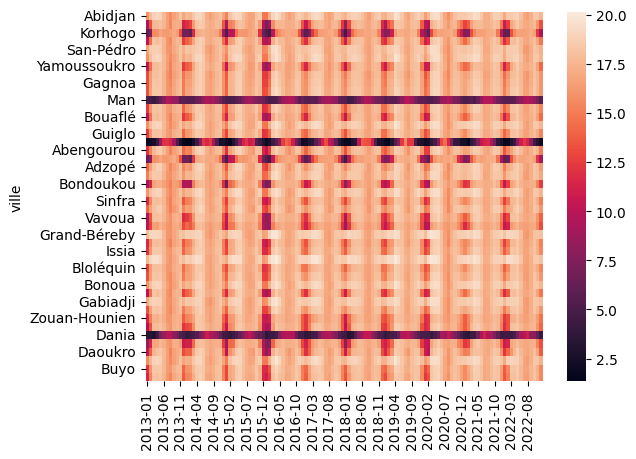

In [ ]:
sns.heatmap(my_data,)

In [ ]:
my_data_1 = dk.sql(f"SELECT * FROM nasa_data_by_year_month WHERE parameters == '{climate_parameter}'").df().iloc[:, 1:]
my_data_1

ville  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
0         Abidjan     4.23     3.08     3.36     3.56     2.64     2.52   
1          Bouaké     4.90     3.59     3.48     3.61     2.91     2.39   
2         Korhogo     5.72     4.63     4.10     4.15     3.84     3.11   
3           Daloa     4.86     3.36     3.57     3.63     3.05     2.48   
4       San-Pédro     4.38     3.18     3.68     3.85     2.53     2.51   
5          Anyama     4.23     3.08     3.36     3.56     2.64     2.52   
6    Yamoussoukro     4.74     3.34     3.58     3.45     2.78     2.48   
7            Divo     4.31     3.08     3.40     3.32     2.48     2.35   
8          Gagnoa     4.74     3.34     3.58     3.45     2.78     2.48   
9          Soubré     4.28     2.94     3.50     3.36     2.55     2.29   
10            Man     0.81     2.28     1.99     4.04     4.61     4.54   
11        Duékoué     5.01     3.48     3.47     3.52     2.97     2.46   
12        Bouaflé     4.74     3.34     3.58     3.45     2.78     2.48   
13    Bingerville     4.16     2.84     3.42     3.35     2.66     2.35   
14         Guiglo     5.01     3.48     3.47     3.52     2.97     2.46   
15         Lakota     3.23     2.94     4.20     4.47     4.18     4.78   
16     Abengourou     4.61     3.23     3.30     3.03     2.98     2.41   
17          Ferké     5.72     4.63     4.10     4.15     3.84     3.11   
18         Adzopé     4.61     3.23     3.30     3.03     2.98     2.41   
19         Méagui     4.28     2.94     3.50     3.36     2.55     2.29   
20      Bondoukou     5.28     4.08     3.61     4.15     3.82     2.78   
21          Dabou     4.23     3.08     3.36     3.56     2.64     2.52   
22         Sinfra     4.74     3.34     3.58     3.45     2.78     2.48   
23      Agboville     4.23     3.08     3.36     3.56     2.64     2.52   
24         Vavoua     5.07     3.79     3.83     4.14     3.14     2.61   
25         Danané     5.08     3.73     3.78     3.43     2.51     2.63   
26   Grand-Béreby     4.38     3.18     3.68     3.85     2.53     2.51   
27           Oumé     4.74     3.34     3.58     3.45     2.78     2.48   
28          Issia     4.86     3.36     3.57     3.63     3.05     2.48   
29   Grand-Bassam     4.16     2.84     3.42     3.35     2.66     2.35   
30      Bloléquin     4.98     3.35     3.13     3.32     2.73     2.54   
31        Okrouyo     4.28     2.94     3.50     3.36     2.55     2.29   
32         Bonoua     4.16     2.84     3.42     3.35     2.66     2.35   
33          Bonon     4.86     3.36     3.57     3.63     3.05     2.48   
34       Gabiadji     4.28     2.94     3.50     3.36     2.55     2.29   
35   Grand-Zattry     4.86     3.36     3.57     3.63     3.05     2.48   
36  Zouan-Hounien     4.98     3.35     3.13     3.32     2.73     2.54   
37       Seitifla     5.07     3.79     3.83     4.14     3.14     2.61   
38          Dania     0.86     1.16     3.68     5.01     4.77     5.08   
39        Séguéla     5.07     3.79     3.83     4.14     3.14     2.61   
40        Daoukro     4.73     3.55     3.51     3.40     3.29     2.49   
41        Aboisso     4.16     2.84     3.42     3.35     2.66     2.35   
42           Buyo     5.01     3.48     3.47     3.52     2.97     2.46   
43         Saïoua     4.86     3.36     3.57     3.63     3.05     2.48   

    2013-07  2013-08  2013-09  ...  2022-03  2022-04  2022-05  2022-06  \
0      2.41     2.42     2.50  ...     2.49     2.80     2.53     2.31   
1      1.76     1.81     1.90  ...     2.89     3.06     2.68     2.68   
2      2.93     2.42     3.13  ...     3.36     3.20     3.07     2.83   
3      1.94     2.15     2.20  ...     2.59     2.84     2.53     2.44   
4      2.50     2.79     2.59  ...     3.01     2.97     2.92     2.52   
5      2.41     2.42     2.50  ...     2.49     2.80     2.53     2.31   
6      2.07     2.15     1.99  ...     2.45     2.83     2.45     2.45   
7      2.33     2.40     2.27  ...     2.37 

Introduire une liste déroulante

In [ ]:
def graph_cities_by_parameter():

    climate_parameter = input("Entrez un paramètre de climat : ")
    my_data_1 = cities_parameter_values(climate_parameter)
    # Transformer le DataFrame en format long pour Seaborn avec la méthode melt
    my_data_1_long = my_data_1.melt(id_vars=["ville"],
                                    var_name="Mois/Année", value_name="Valeur")

    # Tracer le line plot avec Seaborn
    plt.figure(figsize=(20, 12))
    sns.lineplot(data=my_data_1_long, x="Mois/Année", y="Valeur",
                hue="ville", marker="o")

    plt.title(f"Évolution des valeurs de {climate_parameter} par mois/année pour chaque ville")
    plt.xlabel("Mois/Année")
    plt.ylabel(f"Valeur de {climate_parameter}")
    plt.xticks(rotation=90)
    plt.legend(title="Ville")

    # Placer la légende en dehors du cadre du graphique
    plt.legend(title="Ville", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

Entrez un paramètre de climat : QV2M
parameter picked : QV2M


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

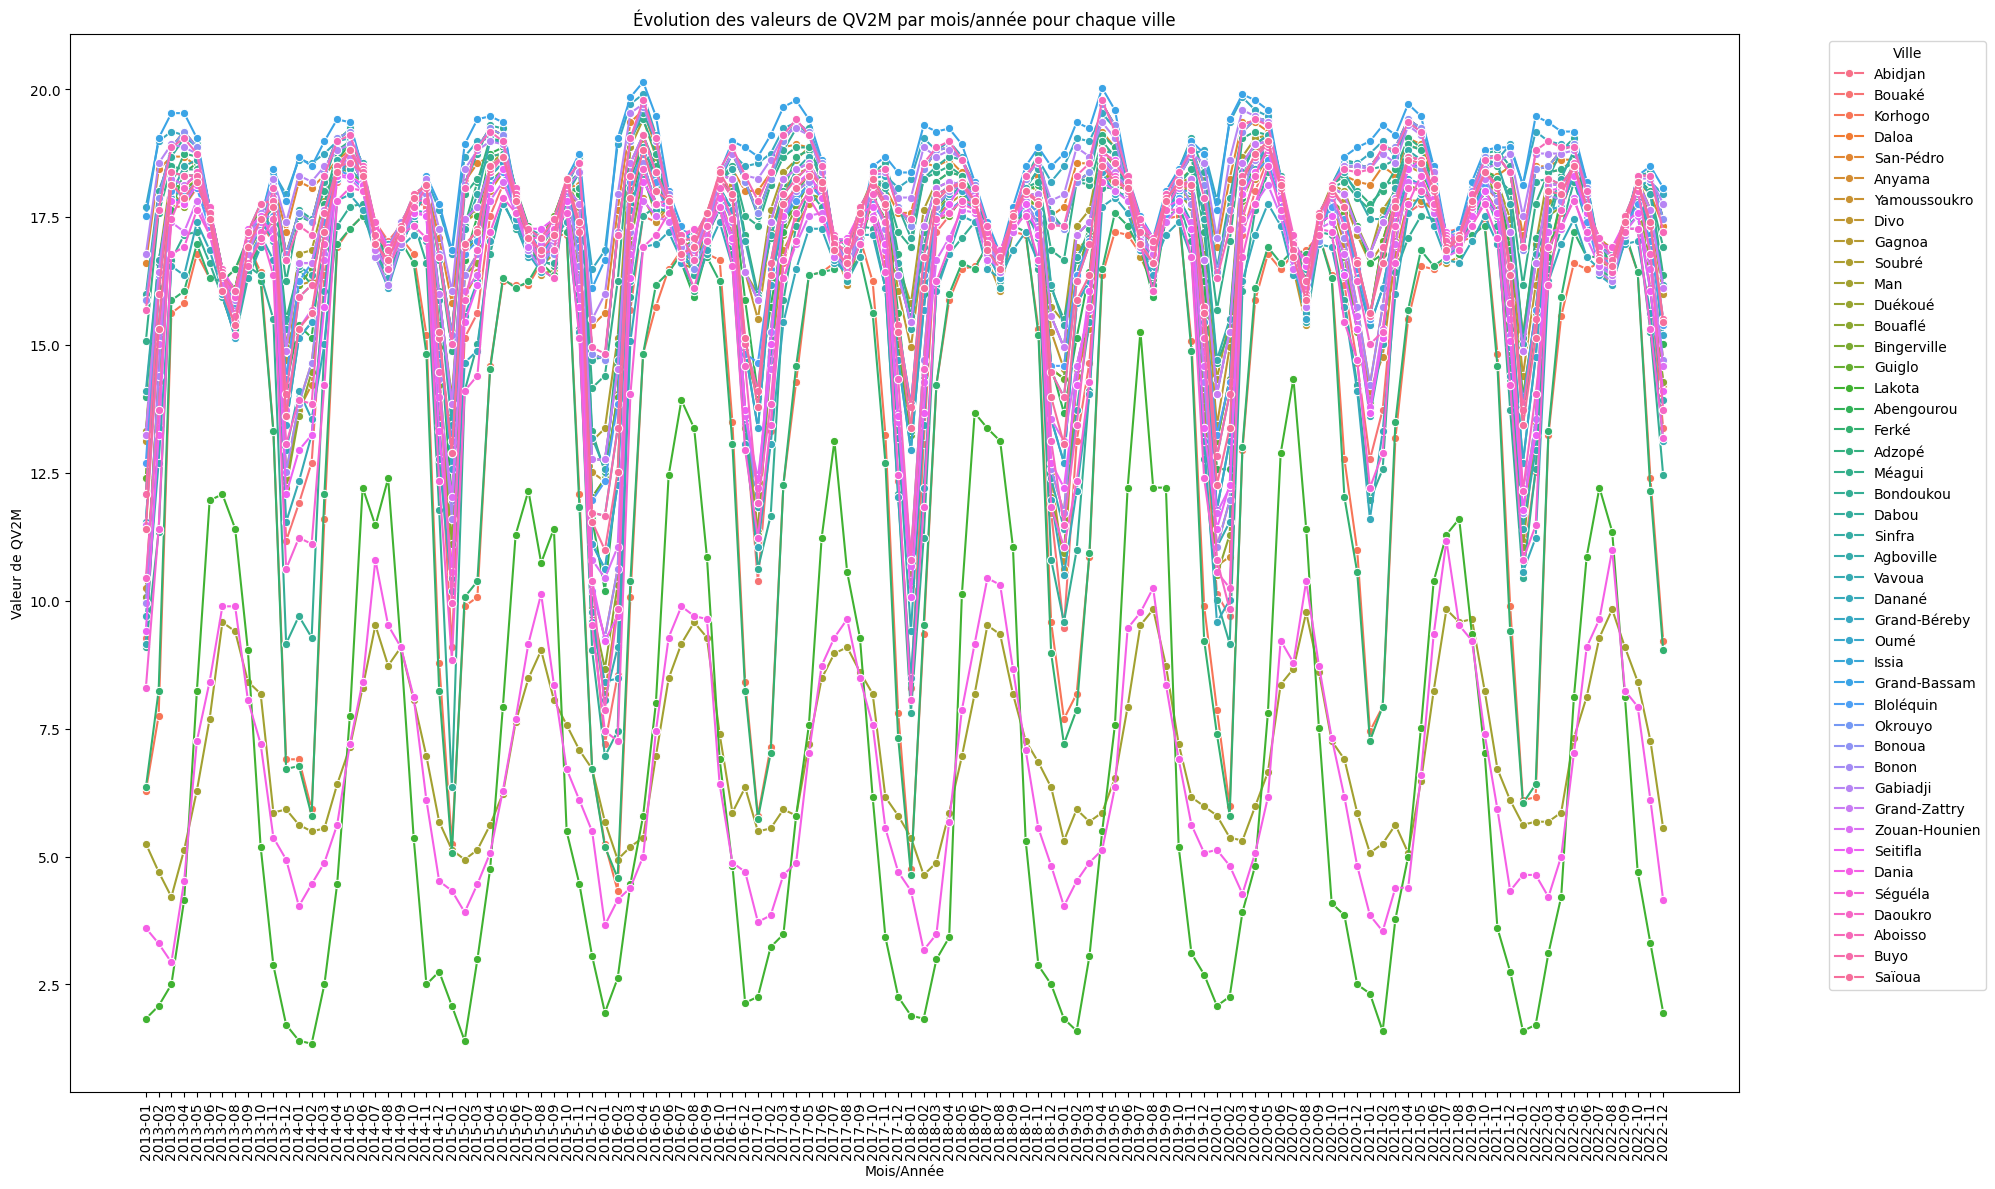

In [ ]:
graph_cities_by_parameter()

Entrez un paramètre de climat : ALLSKY_SFC_PAR_TOT
parameter picked : ALLSKY_SFC_PAR_TOT


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

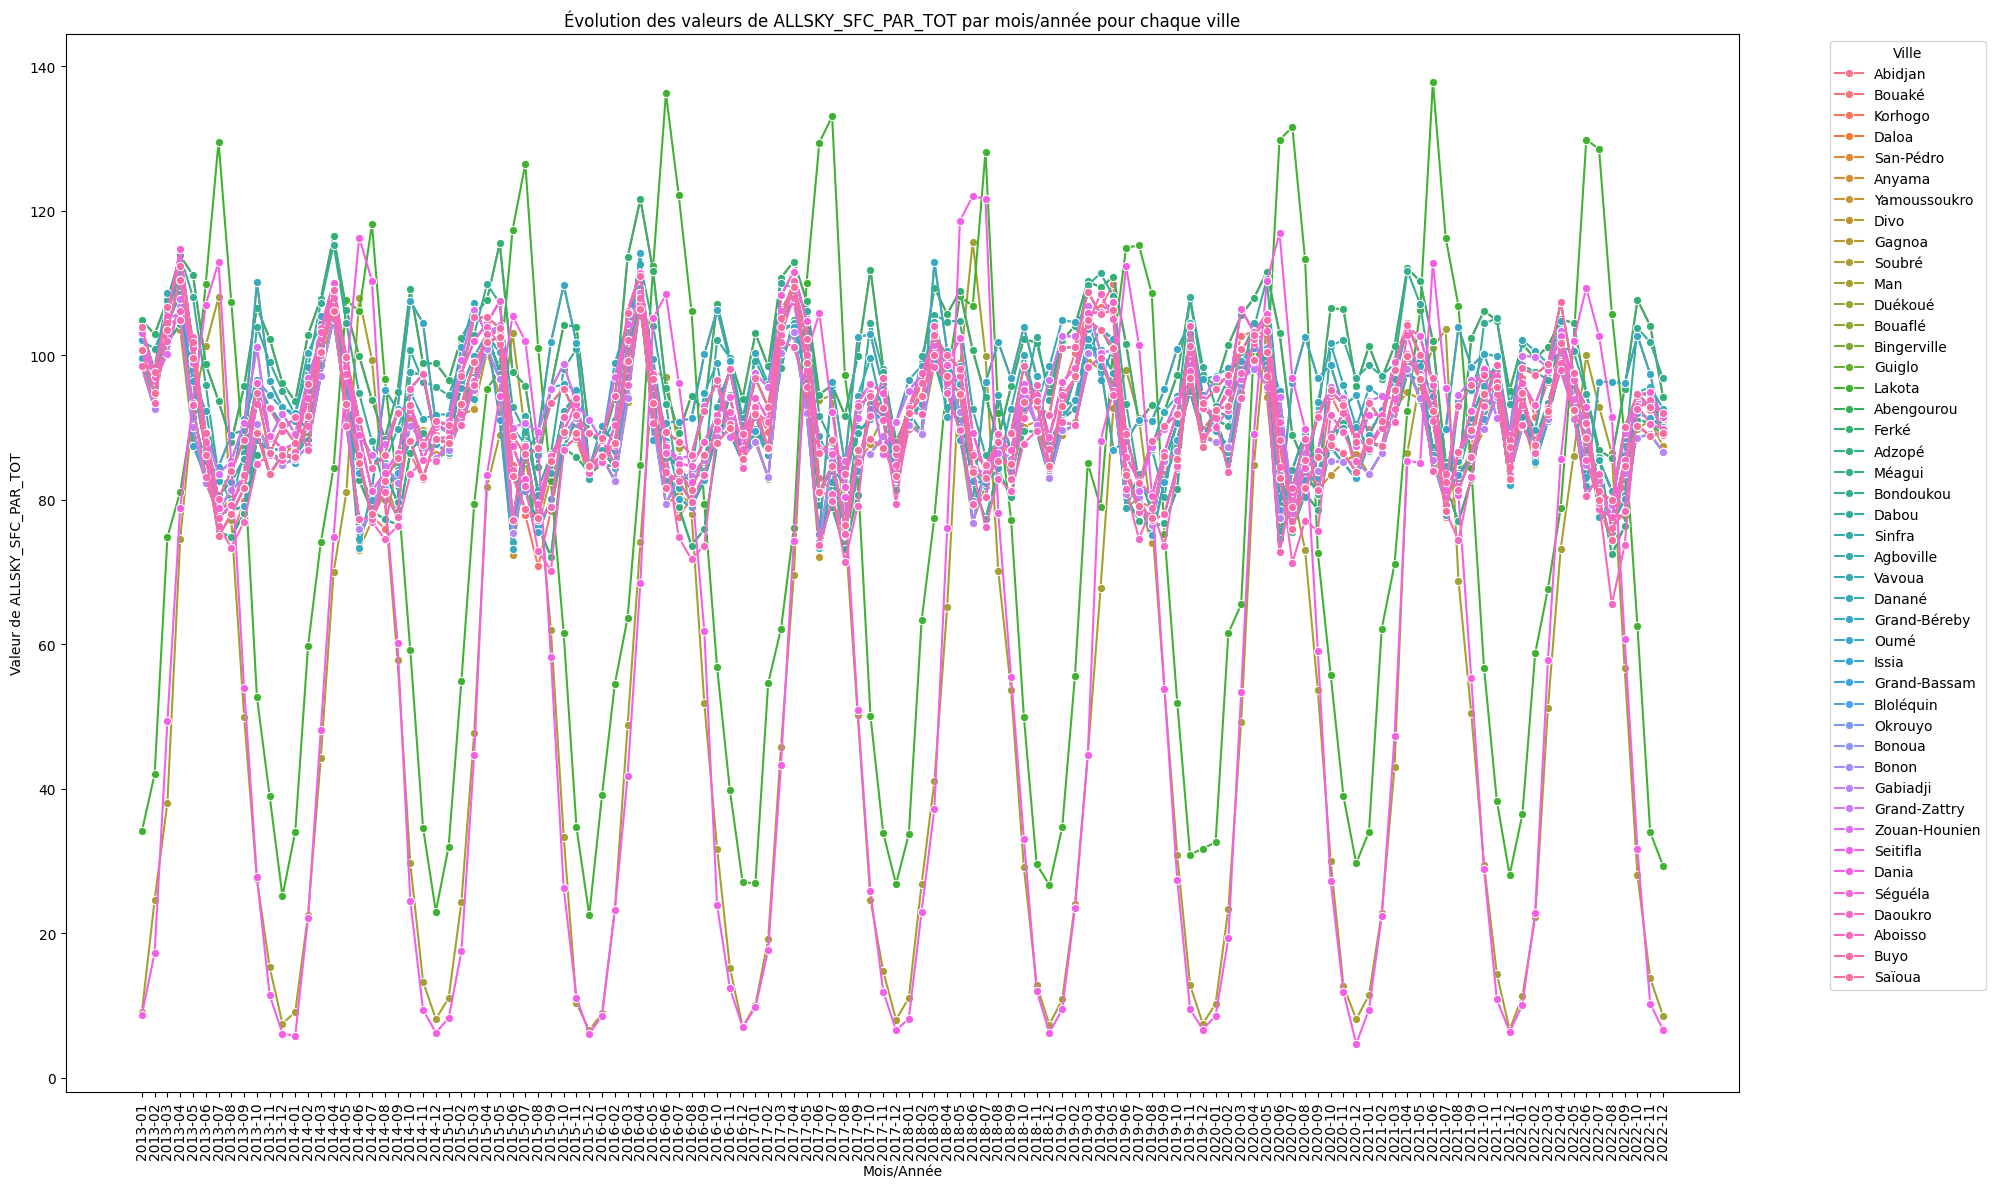

In [ ]:
graph_cities_by_parameter()

On remarque une saisonnalité apparente: cela pourrait être vérifié avec le modèle ARIMA.

### **Création de fonction les valeurs à un moment donné: au changement de l'année et du paramètre, récupération des données**

In [ ]:
skim(table_location_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 44     │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ 2021          │   0 │      0 │  320000 │  830000 │  100000 │  120000 │  140000 │ 230000 │ 5600000 │   ▇    │  │
│ │ 2014          │   0 │      0 │  240000 │  650000 │   64000 │   88000 │  110000 │ 170000 │ 4400000 │   ▇    │  │
│ │ 1998          │   6 │  13.64 │  160000 │  480000 │   13000 │   36000 │   65000 │ 100000 │ 3000000 │   ▇    │  │
│ │ 1988          │   6 │  13.64 │   98000 │  310000 │    6200 │   22000 │   33000 │  59000 │ 1900000 │   ▇    │  │
│ │ 1975          │  12 │  27.27 │   57000 │  170000 │    7000 │   13000 │   20000 │  33000 │  950000 │   ▇    │  │
│ │ longitude     │   0 │      0 │    -7.3 │      14 │     -94 │    -6.6 │    -5.9 │   -4.2 │      10 │     ▁▇ │  │
│ │ latitude      │   0 │      0 │     9.5 │      12 │     4.6 │     5.8 │     6.5 │    7.1 │      56 │   ▇    │  │
│ └───────────────┴─────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ville                     │       0 │          0 │                            1 │                       44 │  │
│ │ region                    │       0 │          0 │                            1 │                       45 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
table_location_data

ville       2021       2014       1998       1988      1975  \
0         Abidjan  5616633.0  4395243.0  2993440.0  1929079.0  951216.0   
1          Bouaké   832371.0   608138.0   481638.0   326910.0  175264.0   
2         Korhogo   440926.0   286071.0   164401.0   109439.0   45250.0   
3           Daloa   421879.0   319427.0   190719.0   121842.0   60837.0   
4       San-Pédro   390654.0   261616.0   131800.0    70590.0   31606.0   
5          Anyama   389592.0   148962.0    79548.0    56690.0   26406.0   
6    Yamoussoukro   340234.0   281735.0   161354.0   106659.0   37253.0   
7            Divo   294559.0   179455.0   120053.0    72329.0   35610.0   
8          Gagnoa   277044.0   213918.0   123832.0    85501.0   42285.0   
9          Soubré   272773.0   175163.0    89182.0    32817.0    7016.0   
10            Man   241969.0   188704.0   142187.0    89575.0   50288.0   
11        Duékoué   220953.0   185344.0    37374.0    27571.0   13297.0   
12        Bouaflé   213967.0   167263.0    76081.0    35750.0   17188.0   
13    Bingerville   204656.0    91319.0    35944.0    28752.0   12527.0   
14         Guiglo   171454.0   113796.0    64094.0    22328.0    9283.0   
15         Lakota   169330.0    77223.0    30154.0    21929.0   12958.0   
16     Abengourou   164424.0   135635.0    92821.0    59106.0   30028.0   
17          Ferké   160267.0   120150.0    73010.0    35139.0   24662.0   
18         Adzopé   156488.0    98846.0   104070.0    36150.0   21147.0   
19         Méagui   153483.0   132294.0    18093.0     7648.0       NaN   
20      Bondoukou   141568.0   117453.0    44335.0    33325.0   19021.0   
21          Dabou   138083.0    88430.0    65453.0    38407.0   23134.0   
22         Sinfra   137210.0   130277.0    49297.0    35340.0   17569.0   
23      Agboville   135082.0    95093.0    82216.0    46324.0   26914.0   
24         Vavoua   132528.0   134651.0    26224.0    22297.0    6957.0   
25         Danané   131586.0   104672.0    74344.0    30941.0   19608.0   
26   Grand-Béreby   129340.0    98686.0        NaN        NaN       NaN   
27           Oumé   127153.0   127850.0    45354.0    28772.0   14032.0   
28          Issia   126252.0    85727.0    56844.0    28821.0   10863.0   
29   Grand-Bassam   124567.0    84028.0    85093.0    41509.0   27273.0   
30      Bloléquin   123133.0    71854.0    24236.0     6608.0       NaN   
31        Okrouyo   120053.0   113366.0        NaN        NaN       NaN   
32         Bonoua   118388.0    69983.0    31875.0    21436.0   17421.0   
33          Bonon   116871.0   112629.0    28140.0    19953.0       NaN   
34       Gabiadji   113369.0   109933.0        NaN        NaN       NaN   
35   Grand-Zattry   112049.0    99343.0        NaN        NaN       NaN   
36  Zouan-Hounien   111099.0    82434.0    13391.0     6189.0       NaN   
37       Seitifla   109252.0    93430.0        NaN        NaN       NaN   
38          Dania   106612.0    77295.0        NaN        NaN       NaN   
39        Séguéla   103980.0    63774.0    50881.0    29149.0   12692.0   
40        Daoukro   101136.0    73134.0    41830.0    21735.0   12575.0   
41        Aboisso   100903.0    86115.0    47343.0    21329.0   13527.0   
42           Buyo   100848.0   103217.0    12953.0     7301.0       NaN   
43         Saïoua   100085.0    86423.0    15869.0    23076.0       NaN   

              region  longitude   latitude  
0            Abidjan  -4.016107   5.320357  
1              Gbêkê  -5.029841   7.690606  
2               Poro  -5.634247   9.457472  
3     Haut-Sassandra  -6.451610   6.876690  
4          San-Pédro  -6.641549   4.758159  
5            Abidjan  -4.056921   5.495890  
6       Yamoussoukro  -5.277603   6.820007  
7        Lôh-Djiboua  -5.359225   5.829404  
8                Gôh  -5.951770   6.132975  
9               Nawa  -6.592833   5.785267  
10            Tonkpi  -4.559115  54.193680  
11            Guémon  -7.425218   6.713973  
12          Marahoué  -5.744423   6.992679  
13    

In [ ]:
nasa_data_by_year

parameters    ville    2013    2014    2015    2016    2017  \
0                  QV2M  Abidjan   17.40   17.76   17.58   17.76   18.07   
1                  RH2M  Abidjan   82.81   84.75   83.81   82.50   85.31   
2             ALLSKY_KT  Abidjan    0.48    0.47    0.47    0.48    0.47   
3             CLOUD_AMT  Abidjan   58.12   59.80   57.10   59.19   63.02   
4             CLRSKY_KT  Abidjan    0.64    0.64    0.62    0.62    0.63   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    4.70    4.60    4.65    4.62    4.67   
744   CLRSKY_SFC_SW_DWN   Saïoua    6.32    6.29    6.16    6.18    6.22   
745  ALLSKY_SFC_PAR_TOT   Saïoua   90.70   89.01   89.35   89.12   89.94   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.56    2.59    2.66    2.66    2.68   
747  CLRSKY_SFC_PAR_TOT   Saïoua  120.46  120.05  117.10  117.74  118.43   

       2018    2019    2020    2021    2022  
0     17.94   18.19   17.94   18.43   17.82  
1     85.06   84.25   83.94   86.94   85.19  
2      0.48    0.48    0.47    0.48    0.47  
3     63.02   65.10   61.73   64.86   65.27  
4      0.63    0.64    0.63    0.63    0.63  
..      ...     ...     ...     ...     ...  
743    4.71    4.73    4.65    4.73    4.63  
744    6.24    6.31    6.26    6.24    6.26  
745   90.58   91.23   89.18   90.62   88.72  
746    2.70    2.65    2.65    2.75    2.67  
747  118.76  120.38  119.08  118.52  118.88  

[748 rows x 12 columns]

### **Récupération des villes et leurs données géographiques dans un dictionnaire**

In [ ]:
# liste des villes et leurs données géographiques latitude et longitude
ville_position_dict = {}
for (i, city) in enumerate(table_location_data.ville):
  ville_position_dict.update({city : [table_location_data.loc[i].latitude,
                                      table_location_data.loc[i].longitude]})

print(ville_position_dict)

{'Abidjan': [5.320357, -4.016107], 'Bouaké': [7.6906058, -5.0298408], 'Korhogo': [9.4574719, -5.6342471], 'Daloa': [6.8766904, -6.4516096], 'San-Pédro': [4.7581592, -6.641549], 'Anyama': [5.4958898, -4.056921], 'Yamoussoukro': [6.8200066, -5.2776034], 'Divo': [5.8294045, -5.3592251], 'Gagnoa': [6.1329749, -5.9517697], 'Soubré': [5.7852673, -6.5928329], 'Man': [54.1936805, -4.5591148], 'Duékoué': [6.71397265, -7.425218155057541], 'Bouaflé': [6.9926792, -5.7444227], 'Bingerville': [5.3577727, -3.8885591], 'Guiglo': [6.43034025, -7.590903211270477], 'Lakota': [43.3773933, -94.09346], 'Abengourou': [6.7269042, -3.4968431], 'Ferké': [9.5939778, -5.1975952], 'Adzopé': [6.106654, -3.861331], 'Méagui': [5.4039253, -6.5551664], 'Bondoukou': [8.0397992, -2.7984258], 'Dabou': [5.322596, -4.3742639], 'Sinfra': [6.6167488, -5.9089494], 'Agboville': [5.931283, -4.2106525], 'Vavoua': [7.3829214, -6.4759117], 'Danané': [7.2597966, -8.1526273], 'Grand-Béreby': [4.6471378, -6.9253452], 'Oumé': [6.382394

In [ ]:
ville_position_dict.items()

dict_items([('Abidjan', [5.320357, -4.016107]), ('Bouaké', [7.6906058, -5.0298408]), ('Korhogo', [9.4574719, -5.6342471]), ('Daloa', [6.8766904, -6.4516096]), ('San-Pédro', [4.7581592, -6.641549]), ('Anyama', [5.4958898, -4.056921]), ('Yamoussoukro', [6.8200066, -5.2776034]), ('Divo', [5.8294045, -5.3592251]), ('Gagnoa', [6.1329749, -5.9517697]), ('Soubré', [5.7852673, -6.5928329]), ('Man', [54.1936805, -4.5591148]), ('Duékoué', [6.71397265, -7.425218155057541]), ('Bouaflé', [6.9926792, -5.7444227]), ('Bingerville', [5.3577727, -3.8885591]), ('Guiglo', [6.43034025, -7.590903211270477]), ('Lakota', [43.3773933, -94.09346]), ('Abengourou', [6.7269042, -3.4968431]), ('Ferké', [9.5939778, -5.1975952]), ('Adzopé', [6.106654, -3.861331]), ('Méagui', [5.4039253, -6.5551664]), ('Bondoukou', [8.0397992, -2.7984258]), ('Dabou', [5.322596, -4.3742639]), ('Sinfra', [6.6167488, -5.9089494]), ('Agboville', [5.931283, -4.2106525]), ('Vavoua', [7.3829214, -6.4759117]), ('Danané', [7.2597966, -8.152627

### **Création de la carte**

In [ ]:

# Définir les données des villes avec leurs coordonnées en Côte d'Ivoire
cities = ville_position_dict

# Créer une liste de noms de villes et de coordonnées
city_names = list(cities.keys())
city_coordinates = list(cities.values())

# Créer une carte graphique avec Plotly
fig = go.Figure()

# Ajouter des points pour chaque ville
for name, [lat, lon] in cities.items():
    fig.add_trace(go.Scattergeo(
        lon=[lon],
        lat=[lat],
        mode='markers+text',
        marker=dict(size=10, color='blue'),
        text=[name],
        textposition="top center"
    ))

# Définir les options de la carte pour afficher uniquement la Côte d'Ivoire
fig.update_geos(
    scope="africa",
    projection_type="conic conformal",
    lonaxis_range=[-10.0, 2.0],  # Longitudes de la Côte d'Ivoire
    lataxis_range=[4.5, 10.0],   # Latitudes de la Côte d'Ivoire
    showcountries=True,
    countrycolor="RebeccaPurple",
    showland=True,
    landcolor="LightGreen",
    showocean=True,
    oceancolor="LightBlue",
    showlakes=True,
    lakecolor="Blue",
    showrivers=True,
    rivercolor="Blue"
)

# Afficher la carte graphique
fig.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Nous avons la possibilité de créer la carte graphique de la carte du monde avec avec un apport de précision sur une zone donnée ici le pays d'intérêt qui est la Côte d'Ivoire.

In [ ]:

# Créer une carte graphique avec Plotly
fig = go.Figure()

# Ajouter une couche de pays pour la Côte d'Ivoire
fig.add_trace(go.Choropleth(
    locations=["CIV"],  # Code ISO du pays pour la Côte d'Ivoire
    z=[1],              # Valeur arbitraire pour chaque pays
    text=["Côte d'Ivoire"],  # Nom du pays
    colorscale="Blues",
    geojson="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",  # GeoJSON des frontières des pays
    showscale=False
))

# Afficher la carte graphique
fig.show()


## **Création de visualisation des valeurs des paramètres extraits pour chaque ville d'intérêt**

Les données de frontière de la Côte d'Ivoire peuvent être récupérées :

**Natural Earth Data**: Natural Earth propose des données gratuites de frontières administratives mondiales à différentes échelles. Vous pouvez télécharger les fichiers shapefile de la Côte d'Ivoire à partir de leur site Web: Natural Earth Data - Côte d'Ivoire

**[DIVA-GIS](https://www.diva-gis.org/gdata): DIVA-GIS** est une source en ligne de données géographiques gratuites. Ils proposent également des données pour les frontières administratives de la Côte d'Ivoire sous forme de fichiers shapefile. Vous pouvez les télécharger depuis leur site Web: DIVA-GIS - Côte d'Ivoire

Il est possible de récupérer ces données avec un fichier de type *.shp* ou un fichier .geojson


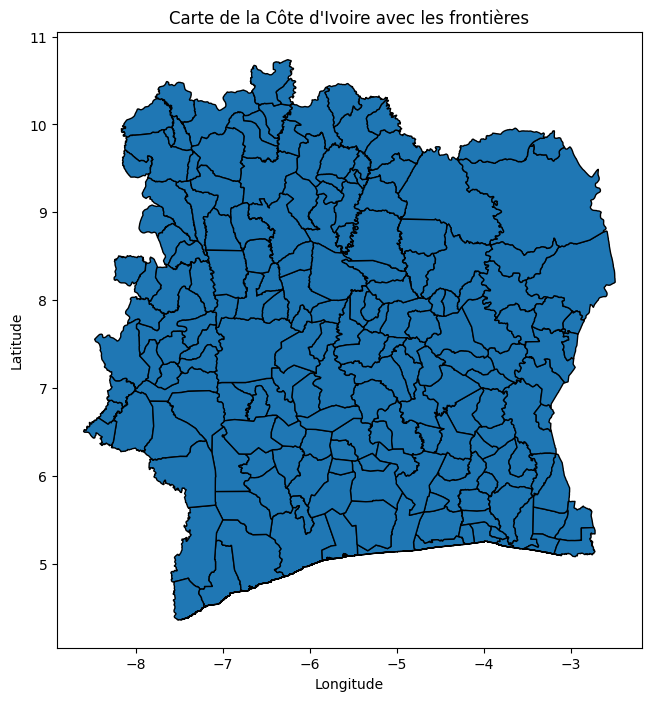

In [ ]:
# Charger les données de la Côte d'Ivoire
cotedivoire = gpd.read_file('CIV_adm3.shp')

# Afficher les frontières
cotedivoire.plot(edgecolor='black', linewidth=1, figsize=(10, 8))
plt.title("Carte de la Côte d'Ivoire avec les frontières")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
display(cotedivoire)

ID_0  ISO         NAME_0  ID_1  NAME_1  ID_2  NAME_2  ID_3  \
0      57  CIV  Côte d'Ivoire     1  Agnéby     1  Adzopé     1   
1      57  CIV  Côte d'Ivoire     1  Agnéby     1  Adzopé     2   
2      57  CIV  Côte d'Ivoire     1  Agnéby     1  Adzopé     3   
3      57  CIV  Côte d'Ivoire     1  Agnéby     1  Adzopé     4   
4      57  CIV  Côte d'Ivoire     1  Agnéby     1  Adzopé     5   
..    ...  ...            ...   ...     ...   ...     ...   ...   
180    57  CIV  Côte d'Ivoire    19  Zanzan    50   Tanda   181   
181    57  CIV  Côte d'Ivoire    19  Zanzan    50   Tanda   182   
182    57  CIV  Côte d'Ivoire    19  Zanzan    50   Tanda   183   
183    57  CIV  Côte d'Ivoire    19  Zanzan    50   Tanda   184   
184    57  CIV  Côte d'Ivoire    19  Zanzan    50   Tanda   185   

               NAME_3           TYPE_3       ENGTYPE_3 NL_NAME_3 VARNAME_3  \
0              Adzope  Sous-préfecture  Sub-prefecture      None      None   
1              Affery  Sous-préfecture  Sub-prefecture      None      None   
2                Agou  Sous-préfecture  Sub-prefecture      None      None   
3              Akoupe  Sous-préfecture  Sub-prefecture      None      None   
4    Yakasse-Attobrou  Sous-préfecture  Sub-prefecture      None      None   
..                ...              ...             ...       ...       ...   
180          Assuefry  Sous-préfecture  Sub-prefecture      None      None   
181   Kouassi-Datekro  Sous-préfecture  Sub-prefecture      None      None   
182          Koun-Fao  Sous-préfecture  Sub-prefecture      None      None   
183             Tanda  Sous-préfecture  Sub-prefecture      None      None   
184           Transua  Sous-préfecture  Sub-prefecture      None      None   

                                              geometry  
0    POLYGON ((-3.42284 6.06668, -3.41760 6.06945, ...  
1    POLYGON ((-4.01829 6.18424, -4.02610 6.19423, ...  
2    POLYGON ((-3.94127 5.76202, -3.94309 5.76843, ...  
3    POLYGON ((-3.64365 6.44046, -3.64470 6.44419, ...  
4    POLYGON ((-3.44423 6.24305, -3.44229 6.23943, ...  
..                                                 ...  
180  POLYGON ((-2.84969 7.77045, -2.85062 7.76191, ...  
181  POLYGON ((-3.45200 7.70172, -3.45001 7.69299, ...  
182  POLYGON ((-3.11893 7.64736, -3.11414 7.64748, ...  
183  POLYGON ((-3.08971 7.66976, -3.09374 7.66957, ...  
184  POLYGON ((-2.93355 7.49909, -2.93470 7.48656, ...  

[185 rows x 14 columns]

NAME_3 représentent les noms des villes

In [ ]:
cotedivoire_sans_geotype = cotedivoire.iloc[:, :-1]

In [ ]:
print(list(cotedivoire.NAME_3))
print(list(table_location_data.ville))

['Adzope', 'Affery', 'Agou', 'Akoupe', 'Yakasse-Attobrou', 'Agboville', 'Azaguie', 'Rubino', 'Booko', 'Borotou', 'Guinteguela', 'Koonan', 'Koro', 'Ouaninou', 'Touba', 'Grand-Bereby', 'San-Pedro', 'Gueyo', 'Sassandra', 'Buyo', 'Grand-Zattry', 'Meagui (Gnamangui)', 'Soubre', 'Grabo', 'Tabou', 'Bako', 'Dioulatiedougou', 'Goulia', 'Kaniasso', 'Madinani', 'Minignan', 'Odienne', 'Samatiguila', 'Seguelon', 'Seydougou', 'Tieme', 'Tienko', 'Bangolo', 'Biankouma', 'Gbonne', 'Sipilou', 'Bin-Houye', 'Danane', 'Zouan-Hounien', 'Facobly', 'Kouibly', 'Logouale', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Ouragahio', 'Diegonefla', 'Oume', 'Bediala', 'Daloa', 'Gboguhe', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Kokoumbo', 'Toumodi', 'Didievi', "Tie-N'diekro", 'Tiebissou', 'Yamoussoukro', 'Abidjan-Ville', 'Alepe', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-Bassam', 'Jacqueville', 'Sikensi', 'Songon', 'Grand-Lahou', 'Taabo', 'Tiassale', 'Bonon', 'Bouafle', 'Sinfra', 'Gohitafla', 'Zuenoula', 'D

In [ ]:
all_studied_cities = list(table_location_data.ville)
def string_upper(x):

  """
  """
  return x.upper()

def string_lower(x):
  """
  """
  return x.lower()

def string_capitalize_fourth_letter(x):
  """
  """
  from unidecode import unidecode
  x = unidecode(x)
  x = x.upper()
  x = x.capitalize()
  return x[:3]

def string_without_accent(enter):

  """
  """
  y = list(map(lambda x: unidecode(x), enter))
  return y

def mes_villes_sans_accent(all_studied_cities):
  """
  """
  our_cities = list(map(lambda x: string_capitalize_fourth_letter(x), all_studied_cities))
  return our_cities

In [ ]:
dk.sql("SELECT NAME_3 FROM cotedivoire_sans_geotype WHERE NAME_3 IN ('Abidjan', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferke', 'Adzope', 'Meagui', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Okrouyo', 'Bonoua', 'Bonon', 'Gabiadji', 'Grand-zattry', 'Zouan-hounien', 'Seitifla', 'Dania', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua')").df()

NAME_3
0         Adzope
1      Agboville
2           Buyo
3         Soubre
4         Danane
5            Man
6         Gagnoa
7           Oume
8          Daloa
9          Issia
10        Saioua
11        Vavoua
12  Yamoussoukro
13        Anyama
14   Bingerville
15        Bonoua
16         Dabou
17         Bonon
18       Bouafle
19        Sinfra
20       Duekoue
21     Blolequin
22        Guiglo
23    Abengourou
24       Daoukro
25       Korhogo
26          Divo
27        Lakota
28       Aboisso
29        Bouake
30       Seguela
31     Bondoukou

In [ ]:
def recup_ville_geopandas():
  """
  """

  villes_sans_accent = mes_villes_sans_accent(all_studied_cities)
  ville_geopandas = []
  for i in list(cotedivoire.NAME_3):
    if i[:3] in villes_sans_accent:
      ville_geopandas.append(i)

  return ville_geopandas


In [ ]:
ville_geopandas = recup_ville_geopandas()
print(len(set(ville_geopandas)), ville_geopandas)

60 ['Adzope', 'Agboville', 'Guinteguela', 'Koro', 'Grand-Bereby', 'San-Pedro', 'Buyo', 'Grand-Zattry', 'Meagui (Gnamangui)', 'Soubre', 'Grabo', 'Seguelon', 'Bin-Houye', 'Danane', 'Zouan-Hounien', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Oume', 'Daloa', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Yamoussoukro', 'Abidjan-Ville', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-Bassam', 'Grand-Lahou', 'Bonon', 'Bouafle', 'Sinfra', 'Duekoue', 'Blolequin', 'Guiglo', 'Abengourou', 'Bongouanou', 'Daoukro', 'Boundiali', 'Ferkessedougou', 'Guiembe', 'Korhogo', 'Sinematiali', 'Divo', 'Guitry', 'Lakota', 'Aboisso', 'Bouake', 'Bonieredougou', 'Dabakala', 'Santama-Sokoro', 'Mankono', 'Seguela', 'Bondoukou', 'Sandegue', 'Bouna']


In [ ]:
print(set(ville_geopandas))

{'Man', 'Dabakala', 'Buyo', 'Bin-Houye', 'Sinfra', 'Grabo', 'Bouake', 'Bonieredougou', 'Zoukougbeu', 'Guiberoua', 'Soubre', 'Duekoue', 'Agboville', 'Seguela', 'Guitry', 'Guinteguela', 'Blolequin', 'Issia', 'Guiembe', 'Saioua', 'Bondoukou', 'Divo', 'Korhogo', 'Grand-Bereby', 'Daoukro', 'Meagui (Gnamangui)', 'Gagnoa', 'Seguelon', 'Koro', 'Bongouanou', 'Vavoua', 'Grand-Zattry', 'Boundiali', 'Grand-Lahou', 'Anyama', 'Bonon', 'Sandegue', 'Aboisso', 'Bouna', 'Guiglo', 'Sangouine', 'Daloa', 'Bouafle', 'Grand-Bassam', 'Zouan-Hounien', 'Danane', 'Bingerville', 'Dabou', 'Oume', 'San-Pedro', 'Santama-Sokoro', 'Abengourou', 'Bonoua', 'Ferkessedougou', 'Mankono', 'Adzope', 'Abidjan-Ville', 'Sinematiali', 'Lakota', 'Yamoussoukro'}


In [ ]:
# les villes
out_cities_in_ville_geopandas = [x for x in string_without_accent(list(table_location_data.ville)) if x in set(ville_geopandas)]
print(len(out_cities_in_ville_geopandas), out_cities_in_ville_geopandas)

37 ['Bouake', 'Korhogo', 'Daloa', 'San-Pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Adzope', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-Bereby', 'Oume', 'Issia', 'Grand-Bassam', 'Blolequin', 'Bonoua', 'Bonon', 'Grand-Zattry', 'Zouan-Hounien', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua']


In [ ]:
liste_des_villes_sans_accent = ['Abidjan', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferke', 'Adzope', 'Meagui', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Okrouyo', 'Bonoua', 'Bonon', 'Gabiadji', 'Grand-zattry', 'Zouan-hounien', 'Seitifla', 'Dania', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua']

In [ ]:
out_cities_not_in_ville_geopandas = [x for x in string_without_accent(list(table_location_data.ville)) if x not in set(ville_geopandas)]
print(out_cities_not_in_ville_geopandas)

['Abidjan', 'Ferke', 'Meagui', 'Okrouyo', 'Gabiadji', 'Seitifla', 'Dania']


Penchons nous sur les villes *'Abidjan', 'Ferke', 'Meagui', 'Okrouyo', 'Gabiadji', 'Seitifla', 'Dania'* dont les noms ont certainement été modifiés dans la structure de données geopandas (cotedivoire).

In [ ]:
for ville in out_cities_not_in_ville_geopandas:
  display(dk.sql(f"SELECT NAME_3 FROM cotedivoire_sans_geotype WHERE NAME_3 LIKE '%{ville}%'"))

┌───────────────┐
│    NAME_3     │
│    varchar    │
├───────────────┤
│ Abidjan-Ville │
└───────────────┘

┌────────────────┐
│     NAME_3     │
│    varchar     │
├────────────────┤
│ Ferkessedougou │
└────────────────┘

┌────────────────────┐
│       NAME_3       │
│      varchar       │
├────────────────────┤
│ Meagui (Gnamangui) │
└────────────────────┘

┌─────────┐
│ NAME_3  │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

┌─────────┐
│ NAME_3  │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

┌─────────┐
│ NAME_3  │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

┌─────────┐
│ NAME_3  │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

In [ ]:
display(dk.sql("SELECT NAME_3 FROM cotedivoire_sans_geotype WHERE NAME_3 LIKE 'Okrouyo'"))

┌─────────┐
│ NAME_3  │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

Nous ne trouvons les coordonnées des villes 'Okrouyo', 'Gabiadji', 'Seitifla', 'Dania' dans la liste des villes de geopandas. Nous les écartons pour le moment dans cette étude.

Liste des villes pour le filtre dans le dataframe geopandas cotedivoire.

In [ ]:
liste_des_villes_sans_accent.index("Man")

10

In [ ]:
print(len(liste_des_villes_sans_accent), liste_des_villes_sans_accent)

44 ['Abidjan', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferke', 'Adzope', 'Meagui', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Okrouyo', 'Bonoua', 'Bonon', 'Gabiadji', 'Grand-zattry', 'Zouan-hounien', 'Seitifla', 'Dania', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua']


In [ ]:
liste_final_etude = liste_des_villes_sans_accent.copy()

In [ ]:
def liste_finale_etude_ville():

  """
  """

  liste_final_etude = liste_des_villes_sans_accent.copy()
  for ville in liste_des_villes_sans_accent:
    if ville == "Abidjan":
      liste_final_etude[liste_des_villes_sans_accent.index(ville)] = "Abidjan-Ville"
    elif ville == "Ferke":
      liste_final_etude[liste_des_villes_sans_accent.index(ville)] = "Ferkessedougou"
    elif ville == "Meagui":
      liste_final_etude[liste_des_villes_sans_accent.index(ville)] = "Meagui (Gnamangui)"

  liste_final_etude = [x for x in liste_final_etude if x not in ('Okrouyo', 'Gabiadji', 'Seitifla', 'Dania')]

  return liste_final_etude


liste_final_etude = liste_finale_etude_ville()
print(len(liste_final_etude), liste_final_etude)

40 ['Abidjan-Ville', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferkessedougou', 'Adzope', 'Meagui (Gnamangui)', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Bonoua', 'Bonon', 'Grand-zattry', 'Zouan-hounien', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua']


Nous travaillerons qu'avec 40 villes en l'occurence celles sus-citées.

In [ ]:
new_cotedivoire = cotedivoire.copy(deep=True) # une copie du dataframe cotedivoire


In [ ]:
# afficher des données des 40 villes d'intérêt
new_cotedivoire = new_cotedivoire.query("NAME_3 in ('Abidjan-Ville', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferkessedougou', 'Adzope', 'Meagui (Gnamangui)', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Bonoua', 'Bonon', 'Grand-zattry', 'Zouan-hounien', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua')")
display(new_cotedivoire)


ID_0  ISO         NAME_0  ID_1              NAME_1  ID_2          NAME_2  \
0      57  CIV  Côte d'Ivoire     1              Agnéby     1          Adzopé   
5      57  CIV  Côte d'Ivoire     1              Agnéby     2       Agboville   
19     57  CIV  Côte d'Ivoire     3       Bas-Sassandra     6          Soubré   
21     57  CIV  Côte d'Ivoire     3       Bas-Sassandra     6          Soubré   
22     57  CIV  Côte d'Ivoire     3       Bas-Sassandra     6          Soubré   
42     57  CIV  Côte d'Ivoire     5  Dix-Huit Montagnes    11          Danané   
47     57  CIV  Côte d'Ivoire     5  Dix-Huit Montagnes    12             Man   
49     57  CIV  Côte d'Ivoire     6            Fromager    13          Gagnoa   
53     57  CIV  Côte d'Ivoire     6            Fromager    14            Oumé   
55     57  CIV  Côte d'Ivoire     7      Haut-Sassandra    15           Daloa   
58     57  CIV  Côte d'Ivoire     7      Haut-Sassandra    16           Issia   
59     57  CIV  Côte d'Ivoire     7      Haut-Sassandra    16           Issia   
60     57  CIV  Côte d'Ivoire     7      Haut-Sassandra    17          Vavoua   
66     57  CIV  Côte d'Ivoire     8                Lacs    19    Yamoussoukro   
67     57  CIV  Côte d'Ivoire     9             Lagunes    20         Abidjan   
69     57  CIV  Côte d'Ivoire     9             Lagunes    20         Abidjan   
70     57  CIV  Côte d'Ivoire     9             Lagunes    20         Abidjan   
71     57  CIV  Côte d'Ivoire     9             Lagunes    20         Abidjan   
72     57  CIV  Côte d'Ivoire     9             Lagunes    20         Abidjan   
80     57  CIV  Côte d'Ivoire    10            Marahoué    23         Bouaflé   
81     57  CIV  Côte d'Ivoire    10            Marahoué    23         Bouaflé   
82     57  CIV  Côte d'Ivoire    10            Marahoué    24          Sinfra   
85     57  CIV  Côte d'Ivoire    11       Moyen-Cavally    26         Duékoué   
86     57  CIV  Côte d'Ivoire    11       Moyen-Cavally    27          Guiglo   
87     57  CIV  Côte d'Ivoire    11       Moyen-Cavally    27          Guiglo   
90     57  CIV  Côte d'Ivoire    12         Moyen-Comoé    28      Abengourou   
98     57  CIV  Côte d'Ivoire    13          N'zi-Comoé    31         Daoukro   
112    57  CIV  Côte d'Ivoire    14             Savanes    35  Ferkessédougou   
121    57  CIV  Côte d'Ivoire    14             Savanes    36         Korhogo   
130    57  CIV  Côte d'Ivoire    15         Sud-Bandama    38            Divo   
134    57  CIV  Côte d'Ivoire    15         Sud-Bandama    39          Lakota   
136    57  CIV  Côte d'Ivoire    16           Sud-Comoé    40         Aboisso   
144    57  CIV  Côte d'Ivoire    17   Vallée du Bandama    42          Bouaké   
171    57  CIV  Côte d'Ivoire    18          Worodougou    47         Séguéla   
174    57  CIV  Côte d'Ivoire    19              Zanzan    48       Bondoukou   

     ID_3              NAME_3           TYPE_3       ENGTYPE_3 NL_NAME_3  \
0       1              Adzope  Sous-préfecture  Sub-prefecture      None   
5       6           Agboville  Sous-préfecture  Sub-prefecture      None   
19     20                Buyo  Sous-préfecture  Sub-prefecture      None   
21     22  Meagui (Gnamangui)  Sous-préfecture  Sub-prefecture      None   
22     23              Soubre  Sous-préfecture  Sub-prefecture      None   
42     43              Danane  Sous-préfecture  Sub-prefecture      None   
47     48                 Man  Sous-préfecture  Sub-prefecture      None   
49     50              Gagnoa  Sous-préfecture  Sub-prefecture      None   
53     54                Oume  Sous-préfecture  Sub-prefecture      None   
55     56               Daloa  Sous-préfecture  Sub-prefecture      None   
58     59               Issia  Sous-préfecture  Sub-prefecture      None   
59     60              Saioua  Sous-préfecture  Sub-prefecture      None   
60     61              Vavoua  Sous-préfecture  Sub-prefecture      None   
66     67        Yamouss

Affichage de la carte et zones d'intérêts

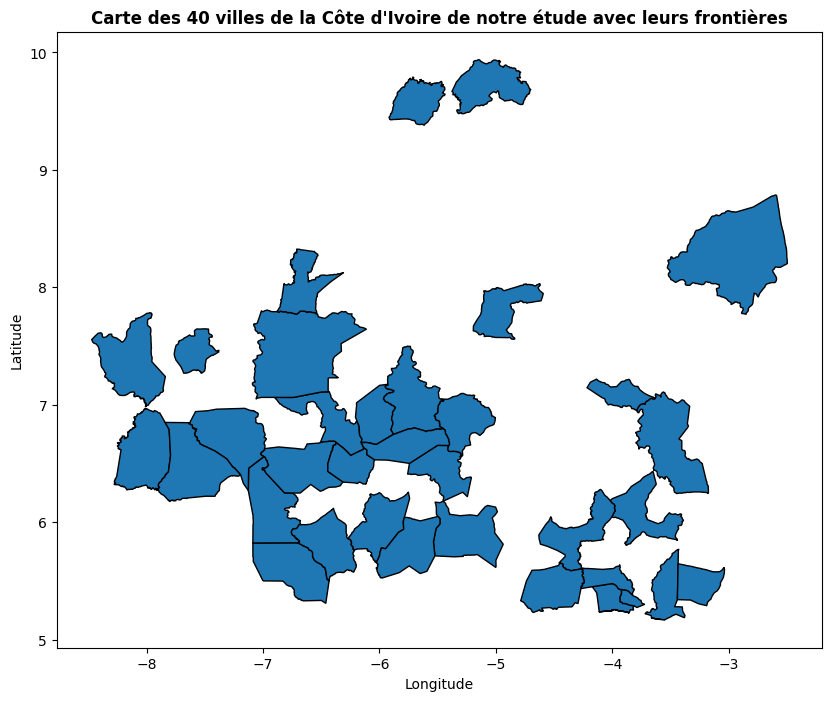

In [ ]:
# Charger les données de la Côte d'Ivoire avec uniquement les nouvelles villes
# Afficher les frontières
new_cotedivoire.plot(edgecolor='black', linewidth=1, figsize=(10, 8))
plt.title("Carte des 40 villes de la Côte d'Ivoire de notre étude avec leurs frontières", fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Ici nous voyons bien l'affichage de zones d'intérêt mais la carte de la Côte d'ivoire n'est pas visible.

Il est préferable de modifier les noms des villes dans *'cotedivoire'* que dans les premières tables créées.


In [ ]:
len(liste_des_villes_sans_accent)

44

In [ ]:
# affichage des caractère des villes dans le dataframe geopandas cotedivoire
print(list(cotedivoire.NAME_3))

['Adzope', 'Affery', 'Agou', 'Akoupe', 'Yakasse-Attobrou', 'Agboville', 'Azaguie', 'Rubino', 'Booko', 'Borotou', 'Guinteguela', 'Koonan', 'Koro', 'Ouaninou', 'Touba', 'Grand-Bereby', 'San-Pedro', 'Gueyo', 'Sassandra', 'Buyo', 'Grand-Zattry', 'Meagui (Gnamangui)', 'Soubre', 'Grabo', 'Tabou', 'Bako', 'Dioulatiedougou', 'Goulia', 'Kaniasso', 'Madinani', 'Minignan', 'Odienne', 'Samatiguila', 'Seguelon', 'Seydougou', 'Tieme', 'Tienko', 'Bangolo', 'Biankouma', 'Gbonne', 'Sipilou', 'Bin-Houye', 'Danane', 'Zouan-Hounien', 'Facobly', 'Kouibly', 'Logouale', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Ouragahio', 'Diegonefla', 'Oume', 'Bediala', 'Daloa', 'Gboguhe', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Kokoumbo', 'Toumodi', 'Didievi', "Tie-N'diekro", 'Tiebissou', 'Yamoussoukro', 'Abidjan-Ville', 'Alepe', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-Bassam', 'Jacqueville', 'Sikensi', 'Songon', 'Grand-Lahou', 'Taabo', 'Tiassale', 'Bonon', 'Bouafle', 'Sinfra', 'Gohitafla', 'Zuenoula', 'D

In [ ]:
print(ville_geopandas)

['Adzope', 'Agboville', 'Guinteguela', 'Koro', 'Grand-Bereby', 'San-Pedro', 'Buyo', 'Grand-Zattry', 'Meagui (Gnamangui)', 'Soubre', 'Grabo', 'Seguelon', 'Bin-Houye', 'Danane', 'Zouan-Hounien', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Oume', 'Daloa', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Yamoussoukro', 'Abidjan-Ville', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-Bassam', 'Grand-Lahou', 'Bonon', 'Bouafle', 'Sinfra', 'Duekoue', 'Blolequin', 'Guiglo', 'Abengourou', 'Bongouanou', 'Daoukro', 'Boundiali', 'Ferkessedougou', 'Guiembe', 'Korhogo', 'Sinematiali', 'Divo', 'Guitry', 'Lakota', 'Aboisso', 'Bouake', 'Bonieredougou', 'Dabakala', 'Santama-Sokoro', 'Mankono', 'Seguela', 'Bondoukou', 'Sandegue', 'Bouna']


In [ ]:
# fonction pour transformer
def string_capitalize_without_accent(enter):

  """
  """
  from unidecode import unidecode
  y = list(map(lambda x: unidecode(x), enter))
  y = list(map(lambda x: x.capitalize(), y))
  return y


In [ ]:
print(len(ville_geopandas), ville_geopandas)

60 ['Adzope', 'Agboville', 'Guinteguela', 'Koro', 'Grand-Bereby', 'San-Pedro', 'Buyo', 'Grand-Zattry', 'Meagui (Gnamangui)', 'Soubre', 'Grabo', 'Seguelon', 'Bin-Houye', 'Danane', 'Zouan-Hounien', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Oume', 'Daloa', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Yamoussoukro', 'Abidjan-Ville', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-Bassam', 'Grand-Lahou', 'Bonon', 'Bouafle', 'Sinfra', 'Duekoue', 'Blolequin', 'Guiglo', 'Abengourou', 'Bongouanou', 'Daoukro', 'Boundiali', 'Ferkessedougou', 'Guiembe', 'Korhogo', 'Sinematiali', 'Divo', 'Guitry', 'Lakota', 'Aboisso', 'Bouake', 'Bonieredougou', 'Dabakala', 'Santama-Sokoro', 'Mankono', 'Seguela', 'Bondoukou', 'Sandegue', 'Bouna']


In [ ]:
liste_final_etude

['Abidjan-Ville',
 'Bouake',
 'Korhogo',
 'Daloa',
 'San-pedro',
 'Anyama',
 'Yamoussoukro',
 'Divo',
 'Gagnoa',
 'Soubre',
 'Man',
 'Duekoue',
 'Bouafle',
 'Bingerville',
 'Guiglo',
 'Lakota',
 'Abengourou',
 'Ferkessedougou',
 'Adzope',
 'Meagui (Gnamangui)',
 'Bondoukou',
 'Dabou',
 'Sinfra',
 'Agboville',
 'Vavoua',
 'Danane',
 'Grand-bereby',
 'Oume',
 'Issia',
 'Grand-bassam',
 'Blolequin',
 'Bonoua',
 'Bonon',
 'Grand-zattry',
 'Zouan-hounien',
 'Seguela',
 'Daoukro',
 'Aboisso',
 'Buyo',
 'Saioua']

In [ ]:
print(len(liste_final_etude))


40


In [ ]:
# transformer les noms de villes d'intérêt

def transform_geodataframe_cities_name():

  """
  """

  new_cotedivoire = cotedivoire.copy(deep=True)
  liste_etude_final = list(new_cotedivoire.NAME_3)
  new_list = list(new_cotedivoire.NAME_3)
  for ville in list(new_cotedivoire.NAME_3):
    if ville == 'Abidjan-Ville':
      new_list[liste_etude_final.index(ville)] = "Abidjan"
    elif ville == "Ferkessedougou":
      new_list[liste_etude_final.index(ville)] = "Ferke"
    elif ville == "Meagui (Gnamangui)":
      new_list[liste_etude_final.index(ville)] = "Meagui"

  new_cotedivoire.NAME_3 = string_capitalize_without_accent(new_list)

  return new_cotedivoire


In [ ]:
new_cotedivoire_table = transform_geodataframe_cities_name()
print(len(new_cotedivoire_table.NAME_3), list(new_cotedivoire_table.NAME_3))


185 ['Adzope', 'Affery', 'Agou', 'Akoupe', 'Yakasse-attobrou', 'Agboville', 'Azaguie', 'Rubino', 'Booko', 'Borotou', 'Guinteguela', 'Koonan', 'Koro', 'Ouaninou', 'Touba', 'Grand-bereby', 'San-pedro', 'Gueyo', 'Sassandra', 'Buyo', 'Grand-zattry', 'Meagui', 'Soubre', 'Grabo', 'Tabou', 'Bako', 'Dioulatiedougou', 'Goulia', 'Kaniasso', 'Madinani', 'Minignan', 'Odienne', 'Samatiguila', 'Seguelon', 'Seydougou', 'Tieme', 'Tienko', 'Bangolo', 'Biankouma', 'Gbonne', 'Sipilou', 'Bin-houye', 'Danane', 'Zouan-hounien', 'Facobly', 'Kouibly', 'Logouale', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Ouragahio', 'Diegonefla', 'Oume', 'Bediala', 'Daloa', 'Gboguhe', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Kokoumbo', 'Toumodi', 'Didievi', "Tie-n'diekro", 'Tiebissou', 'Yamoussoukro', 'Abidjan', 'Alepe', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-bassam', 'Jacqueville', 'Sikensi', 'Songon', 'Grand-lahou', 'Taabo', 'Tiassale', 'Bonon', 'Bouafle', 'Sinfra', 'Gohitafla', 'Zuenoula', 'Duekoue', 'Blol

In [ ]:
# Les villes
out_cities_in_ville_geopandas_ = [x for x in string_capitalize_without_accent(list(table_location_data.ville)) if x in set(string_capitalize_without_accent(new_cotedivoire_table.NAME_3))]
print(len(out_cities_in_ville_geopandas_), out_cities_in_ville_geopandas_)

out_cities_not_in_ville_geopandas_ = [x for x in string_capitalize_without_accent(list(table_location_data.ville)) if x not in set(string_capitalize_without_accent(new_cotedivoire_table.NAME_3))]
print(len(out_cities_not_in_ville_geopandas_), out_cities_not_in_ville_geopandas_)


40 ['Abidjan', 'Bouake', 'Korhogo', 'Daloa', 'San-pedro', 'Anyama', 'Yamoussoukro', 'Divo', 'Gagnoa', 'Soubre', 'Man', 'Duekoue', 'Bouafle', 'Bingerville', 'Guiglo', 'Lakota', 'Abengourou', 'Ferke', 'Adzope', 'Meagui', 'Bondoukou', 'Dabou', 'Sinfra', 'Agboville', 'Vavoua', 'Danane', 'Grand-bereby', 'Oume', 'Issia', 'Grand-bassam', 'Blolequin', 'Bonoua', 'Bonon', 'Grand-zattry', 'Zouan-hounien', 'Seguela', 'Daoukro', 'Aboisso', 'Buyo', 'Saioua']
4 ['Okrouyo', 'Gabiadji', 'Seitifla', 'Dania']


Faire un merge dynamique pour chaque paramètre défini et pour chaque date

In [ ]:
nasa_data_by_year.ville.unique()

<StringArray>
[      'Abidjan',        'Bouaké',       'Korhogo',         'Daloa',
     'San-Pédro',        'Anyama',  'Yamoussoukro',          'Divo',
        'Gagnoa',        'Soubré',           'Man',       'Duékoué',
       'Bouaflé',   'Bingerville',        'Guiglo',        'Lakota',
    'Abengourou',         'Ferké',        'Adzopé',        'Méagui',
     'Bondoukou',         'Dabou',        'Sinfra',     'Agboville',
        'Vavoua',        'Danané',  'Grand-Béreby',          'Oumé',
         'Issia',  'Grand-Bassam',     'Bloléquin',       'Okrouyo',
        'Bonoua',         'Bonon',      'Gabiadji',  'Grand-Zattry',
 'Zouan-Hounien',      'Seitifla',         'Dania',       'Séguéla',
       'Daoukro',       'Aboisso',          'Buyo',        'Saïoua']
Length: 44, dtype: string

In [ ]:
parameter = "QV2M"
year = '2022'
new_data = nasa_data_by_year.query(f"parameters == '{parameter}'")[['ville', f'{year}']]
new_data

ville   2022
0          Abidjan  17.82
17          Bouaké  16.05
34         Korhogo  13.61
51           Daloa  16.48
68       San-Pédro  17.70
85          Anyama  17.82
102   Yamoussoukro  16.30
119           Divo  16.97
136         Gagnoa  17.15
153         Soubré  17.33
170            Man   7.32
187        Duékoué  16.91
204        Bouaflé  16.24
221    Bingerville  17.82
238         Guiglo  16.91
255         Lakota   5.98
272     Abengourou  16.78
289          Ferké  13.73
306         Adzopé  17.33
323         Méagui  17.52
340      Bondoukou  15.75
357          Dabou  17.82
374         Sinfra  16.60
391      Agboville  17.27
408         Vavoua  16.24
425         Danané  15.44
442   Grand-Béreby  18.01
459           Oumé  16.60
476          Issia  16.97
493   Grand-Bassam  18.25
510      Bloléquin  16.78
527        Okrouyo  17.15
544         Bonoua  17.82
561          Bonon  16.48
578       Gabiadji  17.88
595   Grand-Zattry  17.15
612  Zouan-Hounien  16.17
629       Seitifla  16.36
646          Dania   6.84
663        Séguéla  15.75
680        Daoukro  16.36
697        Aboisso  17.88
714           Buyo  16.97
731         Saïoua  16.85

Transformation commune des noms des villes:
- traitement des nom des villes dans *nasa_data_by_year et dans new_cotedivoire_table*

In [ ]:
print(list(new_cotedivoire_table.NAME_3))

['Adzope', 'Affery', 'Agou', 'Akoupe', 'Yakasse-attobrou', 'Agboville', 'Azaguie', 'Rubino', 'Booko', 'Borotou', 'Guinteguela', 'Koonan', 'Koro', 'Ouaninou', 'Touba', 'Grand-bereby', 'San-pedro', 'Gueyo', 'Sassandra', 'Buyo', 'Grand-zattry', 'Meagui', 'Soubre', 'Grabo', 'Tabou', 'Bako', 'Dioulatiedougou', 'Goulia', 'Kaniasso', 'Madinani', 'Minignan', 'Odienne', 'Samatiguila', 'Seguelon', 'Seydougou', 'Tieme', 'Tienko', 'Bangolo', 'Biankouma', 'Gbonne', 'Sipilou', 'Bin-houye', 'Danane', 'Zouan-hounien', 'Facobly', 'Kouibly', 'Logouale', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Ouragahio', 'Diegonefla', 'Oume', 'Bediala', 'Daloa', 'Gboguhe', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Kokoumbo', 'Toumodi', 'Didievi', "Tie-n'diekro", 'Tiebissou', 'Yamoussoukro', 'Abidjan', 'Alepe', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-bassam', 'Jacqueville', 'Sikensi', 'Songon', 'Grand-lahou', 'Taabo', 'Tiassale', 'Bonon', 'Bouafle', 'Sinfra', 'Gohitafla', 'Zuenoula', 'Duekoue', 'Blolequi

In [ ]:
print(len(new_cotedivoire_table.NAME_3), list(new_cotedivoire_table.NAME_3))


185 ['Adzope', 'Affery', 'Agou', 'Akoupe', 'Yakasse-attobrou', 'Agboville', 'Azaguie', 'Rubino', 'Booko', 'Borotou', 'Guinteguela', 'Koonan', 'Koro', 'Ouaninou', 'Touba', 'Grand-bereby', 'San-pedro', 'Gueyo', 'Sassandra', 'Buyo', 'Grand-zattry', 'Meagui', 'Soubre', 'Grabo', 'Tabou', 'Bako', 'Dioulatiedougou', 'Goulia', 'Kaniasso', 'Madinani', 'Minignan', 'Odienne', 'Samatiguila', 'Seguelon', 'Seydougou', 'Tieme', 'Tienko', 'Bangolo', 'Biankouma', 'Gbonne', 'Sipilou', 'Bin-houye', 'Danane', 'Zouan-hounien', 'Facobly', 'Kouibly', 'Logouale', 'Man', 'Sangouine', 'Gagnoa', 'Guiberoua', 'Ouragahio', 'Diegonefla', 'Oume', 'Bediala', 'Daloa', 'Gboguhe', 'Zoukougbeu', 'Issia', 'Saioua', 'Vavoua', 'Kokoumbo', 'Toumodi', 'Didievi', "Tie-n'diekro", 'Tiebissou', 'Yamoussoukro', 'Abidjan', 'Alepe', 'Anyama', 'Bingerville', 'Bonoua', 'Dabou', 'Grand-bassam', 'Jacqueville', 'Sikensi', 'Songon', 'Grand-lahou', 'Taabo', 'Tiassale', 'Bonon', 'Bouafle', 'Sinfra', 'Gohitafla', 'Zuenoula', 'Duekoue', 'Blol

In [ ]:
def geo_merge_dynamic(geopandas_data, parameter, year):

  """
  """

  new_nasa_data_by_year = nasa_data_by_year.copy(deep=True)
  nouveau_ville = list(string_capitalize_without_accent(nasa_data_by_year.ville))
  new_nasa_data_by_year.ville = nouveau_ville

  new_data = new_nasa_data_by_year.query(f"parameters == '{parameter}'")[['ville', f'{year}']]

  geopandas_data = geopandas_data.merge(new_data, how="left",
                                                  left_on="NAME_3",
                                                  right_on="ville")
  # Plotting
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))

  # Plot des frontières de la Côte d'Ivoire
  geopandas_data.boundary.plot(ax=ax, linewidth=1.5)

  # Plot des zones colorées en fonction de la population
  geopandas_data.plot(column=f'{year}', ax=ax,
                      legend=True,
                      cmap='viridis', missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "Missing values",
    })

  # Ajouter une légende
  ax.set_title(f"Villes de Côte d'Ivoire avec les paramètres {parameter} de {year}", fontweight='bold')
  plt.show()


In [ ]:
nasa_data_by_year

parameters    ville    2013    2014    2015    2016    2017  \
0                  QV2M  Abidjan   17.40   17.76   17.58   17.76   18.07   
1                  RH2M  Abidjan   82.81   84.75   83.81   82.50   85.31   
2             ALLSKY_KT  Abidjan    0.48    0.47    0.47    0.48    0.47   
3             CLOUD_AMT  Abidjan   58.12   59.80   57.10   59.19   63.02   
4             CLRSKY_KT  Abidjan    0.64    0.64    0.62    0.62    0.63   
..                  ...      ...     ...     ...     ...     ...     ...   
743   ALLSKY_SFC_SW_DWN   Saïoua    4.70    4.60    4.65    4.62    4.67   
744   CLRSKY_SFC_SW_DWN   Saïoua    6.32    6.29    6.16    6.18    6.22   
745  ALLSKY_SFC_PAR_TOT   Saïoua   90.70   89.01   89.35   89.12   89.94   
746  ALLSKY_SFC_SW_DIFF   Saïoua    2.56    2.59    2.66    2.66    2.68   
747  CLRSKY_SFC_PAR_TOT   Saïoua  120.46  120.05  117.10  117.74  118.43   

       2018    2019    2020    2021    2022  
0     17.94   18.19   17.94   18.43   17.82  
1     85.06   84.25   83.94   86.94   85.19  
2      0.48    0.48    0.47    0.48    0.47  
3     63.02   65.10   61.73   64.86   65.27  
4      0.63    0.64    0.63    0.63    0.63  
..      ...     ...     ...     ...     ...  
743    4.71    4.73    4.65    4.73    4.63  
744    6.24    6.31    6.26    6.24    6.26  
745   90.58   91.23   89.18   90.62   88.72  
746    2.70    2.65    2.65    2.75    2.67  
747  118.76  120.38  119.08  118.52  118.88  

[748 rows x 12 columns]

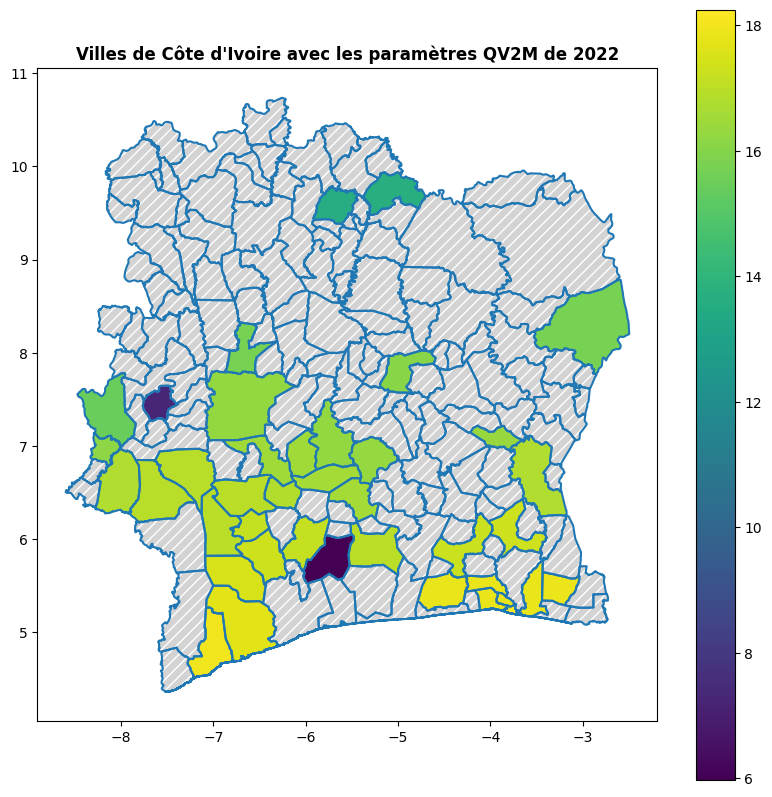

In [ ]:
geo_merge_dynamic(new_cotedivoire_table, 'QV2M', '2022')

Vérifions la présence de toutes les villes

Rendre dynamique avec le module **Ipywidget**

**Interactive Mapping with geopandas**

In [ ]:
def interactive_geo_merge_dynamic(parameter, year):

  """
  """

  new_nasa_data_by_year = nasa_data_by_year.copy(deep=True)
  nouveau_ville = list(string_capitalize_without_accent(nasa_data_by_year.ville))
  new_nasa_data_by_year.ville = nouveau_ville

  new_data = new_nasa_data_by_year.query(f"parameters == '{parameter}'")[['ville', f'{year}']]
  geopandas_data = new_cotedivoire_table.merge(new_data, how="left",
                                                  left_on="NAME_3",
                                                  right_on="ville")

  # Plot des zones colorées en fonction de la population
  return geopandas_data.explore(column=f'{year}',
                         tooltip=f'{year}',
                         cmap='viridis',
                         popup=True,  # show all values in popup (on click)
                         tiles="CartoDB positron",  # use "CartoDB positron" tiles
                         style_kwds=dict(color="black"),
    )


Il nous faut modifier le nom des villes et supprimer les accents.

Note that the GeoDataFrame needs to have a CRS set if you want to use background tiles.

In [ ]:
interactive_geo_merge_dynamic('QV2M', '2022')


Output hidden; open in https://colab.research.google.com to view.

**Création de graphes interactifs avec matplotlib and ipywidgets**

Notice here we could create code with ipywidgets to control and lay graph interaction out using HBox and VBox (read ipywidgets for more informations)

In [ ]:
# create climate parameters studied
climate_parameters = list(nasa_data_by_year_month.parameters.unique())
print(len(climate_parameters), climate_parameters)


17 ['QV2M', 'RH2M', 'ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN', 'PRECTOTCORR', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'ALLSKY_SRF_ALB', 'PRECTOTCORR_SUM', 'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_SW_DIFF', 'CLRSKY_SFC_PAR_TOT']


In [ ]:
def visualisation_valeur_climat():

    """
    """
    climate_options =  climate_parameters
    years_options = list(nasa_data_by_year.iloc[:, 2:].columns)

    # dropdown
    dropdown = widgets.Dropdown(options=climate_options, description="Choisissez l'un des paramètres climatiques : ")
    radiobuttons = widgets.RadioButtons(
        value="2013",
        options=years_options,
        description="Année",

    )

    dropdown.observe(interactive_geo_merge_dynamic, names='value')
    radiobuttons.observe(interactive_geo_merge_dynamic, names='value')

    #display(widgets.HBox([radiobuttons, dropdown]))
    return display(widgets.interact(interactive_geo_merge_dynamic, parameter=climate_options,  year=years_options))

In [ ]:
visualisation_valeur_climat()

interactive(children=(Dropdown(description='parameter', options=('QV2M', 'RH2M', 'ALLSKY_KT', 'CLOUD_AMT', 'CL…

<function __main__.interactive_geo_merge_dynamic(parameter, year)>

## **Défintion des paramètres climatiques étudiés**

Vous pouvez trouver la signification des 17 paramètres étudiés sur le site de la [NASA POWER](https://power.larc.nasa.gov/). Vous pouvez aussi les retrouver groupés dans le fichier ***parameters_meanings.txt***

# **Conclusion**

Ce notebook permet nait deux fonctions essentielles :    
- ***interact_visualisation_evolution_pop()*** : la représentation graphique de l'évolution populations en fonction des années (serait très utiles avec les données de richesse des populations par villes);
- ***visualisation_valeur_climat()*** : le mapping des villes avec la visualisation des valeurs par coloration des paramètres étudiés issus de la NASA POWER (possible grâce aux librairies **geopandas, plotly et ipywidgets**).

NB: Le bon fonctionnement de ce notebook nécessite le téléchargement des fichiers CIV_admin3 avec les différentes extensions .cpg, .csv, .dbf, .prj, .shp et .shx et des fichiers cities-data-and-location.csv et nasa-renewable-energy-data.csv extraits, pour rappel, de l'API REST de la [NASA POWER](https://power.larc.nasa.gov/api/pages/?urls.primaryName=Monthly%20%26%20Annual)